# **Project**    - Prediction of Bike Sharing Demand



In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

### Loading the dataset as df

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/SeoulBikeData - SeoulBikeData.csv')

Mounted at /content/drive


In [3]:
df.head()

Date  Rented Bike Count  Hour  Temperature(蚓)  Humidity(%)  \
0  01/12/2017                254     0            -5.2           37   
1  01/12/2017                204     1            -5.5           38   
2  01/12/2017                173     2            -6.0           39   
3  01/12/2017                107     3            -6.2           40   
4  01/12/2017                 78     4            -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(蚓)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   
3               0.9              2000                     -17.6   
4               2.3              2000                     -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Shape of the dataset

In [4]:
df.shape

(8760, 14)

### Basic stats of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(蚓)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(蚓)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [6]:
import pandas as pd
duplicate_counts = df.apply(lambda x: x.duplicated().sum())
print(duplicate_counts)

Date                        8395
Rented Bike Count           6594
Hour                        8736
Temperature(蚓)              8214
Humidity(%)                 8670
Wind speed (m/s)            8695
Visibility (10m)            6971
Dew point temperature(蚓)    8204
Solar Radiation (MJ/m2)     8415
Rainfall(mm)                8699
Snowfall (cm)               8709
Seasons                     8756
Holiday                     8758
Functioning Day             8758
dtype: int64


In [7]:
df.isnull().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(蚓)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(蚓)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

##Understanding the dataset

In [8]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(蚓)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(蚓)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [9]:
df.describe().round(2)

Rented Bike Count     Hour  Temperature(蚓)  Humidity(%)  \
count            8760.00  8760.00         8760.00      8760.00   
mean              704.60    11.50           12.88        58.23   
std               645.00     6.92           11.94        20.36   
min                 0.00     0.00          -17.80         0.00   
25%               191.00     5.75            3.50        42.00   
50%               504.50    11.50           13.70        57.00   
75%              1065.25    17.25           22.50        74.00   
max              3556.00    23.00           39.40        98.00   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(蚓)  \
count           8760.00           8760.00                   8760.00   
mean               1.72           1436.83                      4.07   
std                1.04            608.30                     13.06   
min                0.00             27.00                    -30.60   
25%                0.90            940.00                     -4.70   
50%                1.50           1698.00                      5.10   
75%                2.30           2000.00                     14.80   
max                7.40           2000.00                     27.20   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count                  8760.00       8760.00        8760.00  
mean                      0.57          0.15           0.08  
std                       0.87          1.13           0.44  
min                       0.00          0.00           0.00  
25%                       0.00          0.00           0.00  
50%                       0.01          0.00           0.00  
75%                       0.93          0.00           0.00  
max                       3.52         35.00           8.80

In [10]:
df.describe(include = 'all').round(2)

Date  Rented Bike Count     Hour  Temperature(蚓)  Humidity(%)  \
count         8760            8760.00  8760.00         8760.00      8760.00   
unique         365                NaN      NaN             NaN          NaN   
top     01/12/2017                NaN      NaN             NaN          NaN   
freq            24                NaN      NaN             NaN          NaN   
mean           NaN             704.60    11.50           12.88        58.23   
std            NaN             645.00     6.92           11.94        20.36   
min            NaN               0.00     0.00          -17.80         0.00   
25%            NaN             191.00     5.75            3.50        42.00   
50%            NaN             504.50    11.50           13.70        57.00   
75%            NaN            1065.25    17.25           22.50        74.00   
max            NaN            3556.00    23.00           39.40        98.00   

        Wind speed (m/s)  Visibility (10m)  Dew point temperature(蚓)  \
count            8760.00           8760.00                   8760.00   
unique               NaN               NaN                       NaN   
top                  NaN               NaN                       NaN   
freq                 NaN               NaN                       NaN   
mean                1.72           1436.83                      4.07   
std                 1.04            608.30                     13.06   
min                 0.00             27.00                    -30.60   
25%                 0.90            940.00                     -4.70   
50%                 1.50           1698.00                      5.10   
75%                 2.30           2000.00                     14.80   
max                 7.40           2000.00                     27.20   

        Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
count                   8760.00       8760.00        8760.00    8760   
unique                      NaN           NaN            NaN       4   
top                         NaN           NaN            NaN  Spring   
freq                        NaN           NaN            NaN    2208   
mean                       0.57          0.15           0.08     NaN   
std                        0.87          1.13           0.44     NaN   
min                        0.00          0.00           0.00     NaN   
25%                        0.00          0.00           0.00     NaN   
50%                        0.01          0.00           0.00     NaN   
75%                        0.93          0.00           0.00     NaN   
max                        3.52         35.00           8.80     NaN   

           Holiday Functioning Day  
count         8760            8760  
unique           2               2  
top     No Holiday             Yes  
freq          8328            8465  
mean           NaN             NaN  
std            NaN             NaN  
min            NaN             NaN  
25%            NaN             NaN  
50%            NaN             NaN  
75%            NaN             NaN  
max            NaN             NaN

In [11]:
for i in df.columns.tolist():
  print("No of unique values in", i, "is", df[i].nunique())

No of unique values in Date is 365
No of unique values in Rented Bike Count is 2166
No of unique values in Hour is 24
No of unique values in Temperature(蚓) is 546
No of unique values in Humidity(%) is 90
No of unique values in Wind speed (m/s) is 65
No of unique values in Visibility (10m) is 1789
No of unique values in Dew point temperature(蚓) is 556
No of unique values in Solar Radiation (MJ/m2) is 345
No of unique values in Rainfall(mm) is 61
No of unique values in Snowfall (cm) is 51
No of unique values in Seasons is 4
No of unique values in Holiday is 2
No of unique values in Functioning Day is 2


##Data Wrangling

In [12]:
df_new = df.copy()

In [13]:
# Renaming the columns
df_new.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(蚓)':'temperature', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(蚓)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'},
          inplace=True)

In [14]:
df_new.columns

Index(['date', 'rented_bike_count', 'hour', 'temperature', 'humidity',
       'wind_speed', 'visibility', 'dew_point_temp', 'solar_radiation',
       'rainfall', 'snowfall', 'seasons', 'holiday', 'func_day'],
      dtype='object')

In [15]:
df_new.head()

date  rented_bike_count  hour  temperature  humidity  wind_speed  \
0  01/12/2017                254     0         -5.2        37         2.2   
1  01/12/2017                204     1         -5.5        38         0.8   
2  01/12/2017                173     2         -6.0        39         1.0   
3  01/12/2017                107     3         -6.2        40         0.9   
4  01/12/2017                 78     4         -6.0        36         2.3   

   visibility  dew_point_temp  solar_radiation  rainfall  snowfall seasons  \
0        2000           -17.6              0.0       0.0       0.0  Winter   
1        2000           -17.6              0.0       0.0       0.0  Winter   
2        2000           -17.7              0.0       0.0       0.0  Winter   
3        2000           -17.6              0.0       0.0       0.0  Winter   
4        2000           -18.6              0.0       0.0       0.0  Winter   

      holiday func_day  
0  No Holiday      Yes  
1  No Holiday      Yes  
2  No Holiday      Yes  
3  No Holiday      Yes  
4  No Holiday      Yes

In [16]:
#Converting date column into datetime datatype
df_new['date'] = df_new['date'].apply(lambda x: dt.strptime(x,'%d/%m/%Y'))
df_new.head()

date  rented_bike_count  hour  temperature  humidity  wind_speed  \
0 2017-12-01                254     0         -5.2        37         2.2   
1 2017-12-01                204     1         -5.5        38         0.8   
2 2017-12-01                173     2         -6.0        39         1.0   
3 2017-12-01                107     3         -6.2        40         0.9   
4 2017-12-01                 78     4         -6.0        36         2.3   

   visibility  dew_point_temp  solar_radiation  rainfall  snowfall seasons  \
0        2000           -17.6              0.0       0.0       0.0  Winter   
1        2000           -17.6              0.0       0.0       0.0  Winter   
2        2000           -17.7              0.0       0.0       0.0  Winter   
3        2000           -17.6              0.0       0.0       0.0  Winter   
4        2000           -18.6              0.0       0.0       0.0  Winter   

      holiday func_day  
0  No Holiday      Yes  
1  No Holiday      Yes  
2  No Holiday      Yes  
3  No Holiday      Yes  
4  No Holiday      Yes

In [17]:
# day_of_week(mon-1 to sun-7)
df_new['month'] = df_new['date'].apply(lambda x : x.month)
df_new['day_of_week'] = df_new['date'].apply(lambda x : x.isoweekday())
df_new.head()

date  rented_bike_count  hour  temperature  humidity  wind_speed  \
0 2017-12-01                254     0         -5.2        37         2.2   
1 2017-12-01                204     1         -5.5        38         0.8   
2 2017-12-01                173     2         -6.0        39         1.0   
3 2017-12-01                107     3         -6.2        40         0.9   
4 2017-12-01                 78     4         -6.0        36         2.3   

   visibility  dew_point_temp  solar_radiation  rainfall  snowfall seasons  \
0        2000           -17.6              0.0       0.0       0.0  Winter   
1        2000           -17.6              0.0       0.0       0.0  Winter   
2        2000           -17.7              0.0       0.0       0.0  Winter   
3        2000           -17.6              0.0       0.0       0.0  Winter   
4        2000           -18.6              0.0       0.0       0.0  Winter   

      holiday func_day  month  day_of_week  
0  No Holiday      Yes     12            5  
1  No Holiday      Yes     12            5  
2  No Holiday      Yes     12            5  
3  No Holiday      Yes     12            5  
4  No Holiday      Yes     12            5

In [18]:
df_new['weekend'] = df_new['day_of_week'].apply(lambda x: 1 if x>5 else 0)
df_new.head()

date  rented_bike_count  hour  temperature  humidity  wind_speed  \
0 2017-12-01                254     0         -5.2        37         2.2   
1 2017-12-01                204     1         -5.5        38         0.8   
2 2017-12-01                173     2         -6.0        39         1.0   
3 2017-12-01                107     3         -6.2        40         0.9   
4 2017-12-01                 78     4         -6.0        36         2.3   

   visibility  dew_point_temp  solar_radiation  rainfall  snowfall seasons  \
0        2000           -17.6              0.0       0.0       0.0  Winter   
1        2000           -17.6              0.0       0.0       0.0  Winter   
2        2000           -17.7              0.0       0.0       0.0  Winter   
3        2000           -17.6              0.0       0.0       0.0  Winter   
4        2000           -18.6              0.0       0.0       0.0  Winter   

      holiday func_day  month  day_of_week  weekend  
0  No Holiday      Yes     12            5        0  
1  No Holiday      Yes     12            5        0  
2  No Holiday      Yes     12            5        0  
3  No Holiday      Yes     12            5        0  
4  No Holiday      Yes     12            5        0

In [19]:
df_new.describe(include='all').round(2)

date  rented_bike_count     hour  temperature  \
count                  8760            8760.00  8760.00      8760.00   
unique                  365                NaN      NaN          NaN   
top     2017-12-01 00:00:00                NaN      NaN          NaN   
freq                     24                NaN      NaN          NaN   
first   2017-12-01 00:00:00                NaN      NaN          NaN   
last    2018-11-30 00:00:00                NaN      NaN          NaN   
mean                    NaN             704.60    11.50        12.88   
std                     NaN             645.00     6.92        11.94   
min                     NaN               0.00     0.00       -17.80   
25%                     NaN             191.00     5.75         3.50   
50%                     NaN             504.50    11.50        13.70   
75%                     NaN            1065.25    17.25        22.50   
max                     NaN            3556.00    23.00        39.40   

        humidity  wind_speed  visibility  dew_point_temp  solar_radiation  \
count    8760.00     8760.00     8760.00         8760.00          8760.00   
unique       NaN         NaN         NaN             NaN              NaN   
top          NaN         NaN         NaN             NaN              NaN   
freq         NaN         NaN         NaN             NaN              NaN   
first        NaN         NaN         NaN             NaN              NaN   
last         NaN         NaN         NaN             NaN              NaN   
mean       58.23        1.72     1436.83            4.07             0.57   
std        20.36        1.04      608.30           13.06             0.87   
min         0.00        0.00       27.00          -30.60             0.00   
25%        42.00        0.90      940.00           -4.70             0.00   
50%        57.00        1.50     1698.00            5.10             0.01   
75%        74.00        2.30     2000.00           14.80             0.93   
max        98.00        7.40     2000.00           27.20             3.52   

        rainfall  snowfall seasons     holiday func_day    month  day_of_week  \
count    8760.00   8760.00    8760        8760     8760  8760.00       8760.0   
unique       NaN       NaN       4           2        2      NaN          NaN   
top          NaN       NaN  Spring  No Holiday      Yes      NaN          NaN   
freq         NaN       NaN    2208        8328     8465      NaN          NaN   
first        NaN       NaN     NaN         NaN      NaN      NaN          NaN   
last         NaN       NaN     NaN         NaN      NaN      NaN          NaN   
mean        0.15      0.08     NaN         NaN      NaN     6.53          4.0   
std         1.13      0.44     NaN         NaN      NaN     3.45          2.0   
min         0.00      0.00     NaN         NaN      NaN     1.00          1.0   
25%         0.00      0.00     NaN         NaN      NaN     4.00          2.0   
50%         0.00      0.00     NaN         NaN      NaN     7.00          4.0   
75%         0.00      0.00     NaN         NaN      NaN    10.00          6.0   
max        35.00      8.80     NaN         NaN      NaN    12.00          7.0   

        weekend  
count   8760.00  
unique      NaN  
top         NaN  
freq        NaN  
first       NaN  
last        NaN  
mean       0.28  
std        0.45  
min        0.00  
25%        0.00  
50%        0.00  
75%        1.00  
max        1.00

Defining continuous, categorical independent and dependent variables

In [20]:
cont_var = ['temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temp','solar_radiation', 'rainfall', 'snowfall']

In [21]:
cat_var = ['hour','seasons', 'holiday', 'func_day', 'month', 'day_of_week', 'weekend']

In [22]:
dep_var = ['rented_bike_count']

##Understading the data through data visualization

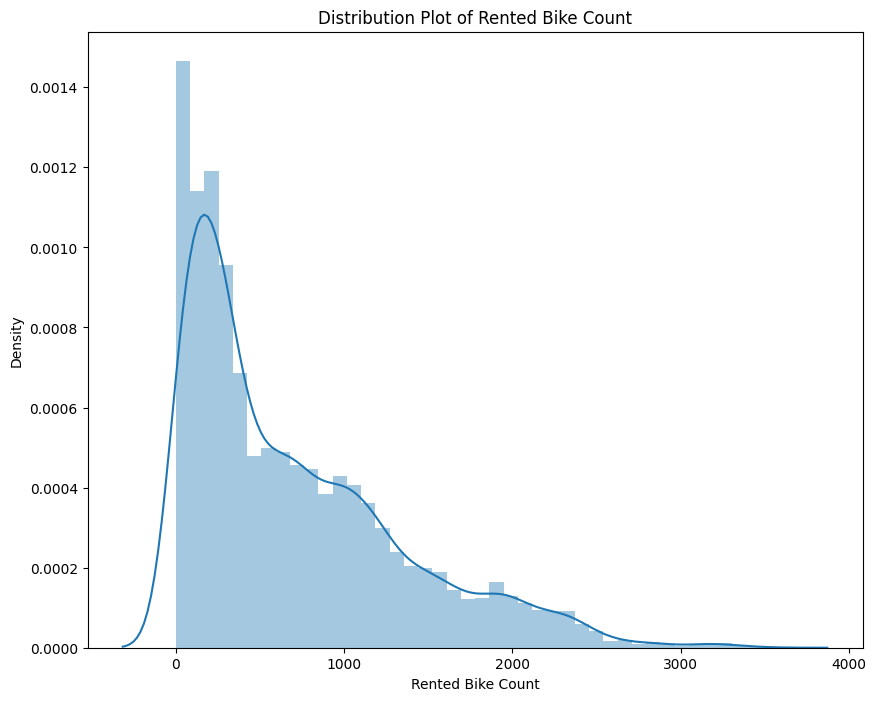

In [23]:
plt.figure(figsize=(10,8))
sns.distplot(df_new['rented_bike_count'])
plt.xlabel("Rented Bike Count")
plt.title('Distribution Plot of Rented Bike Count')
plt.show()

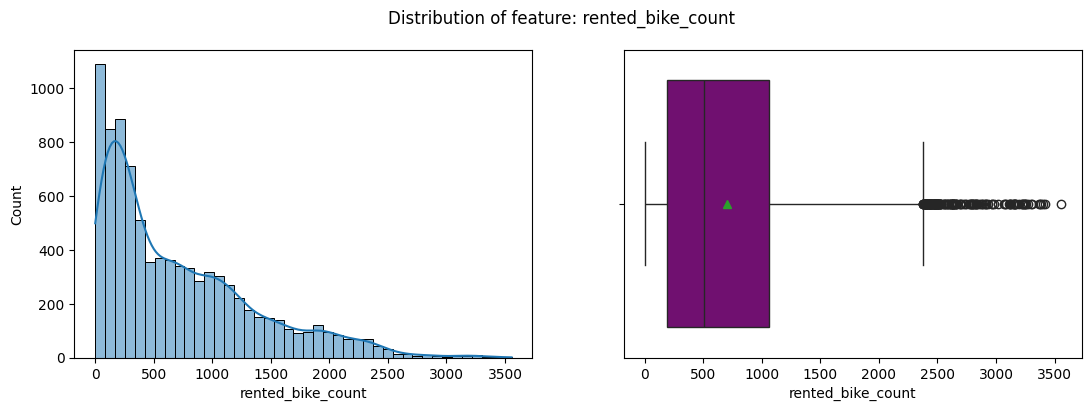

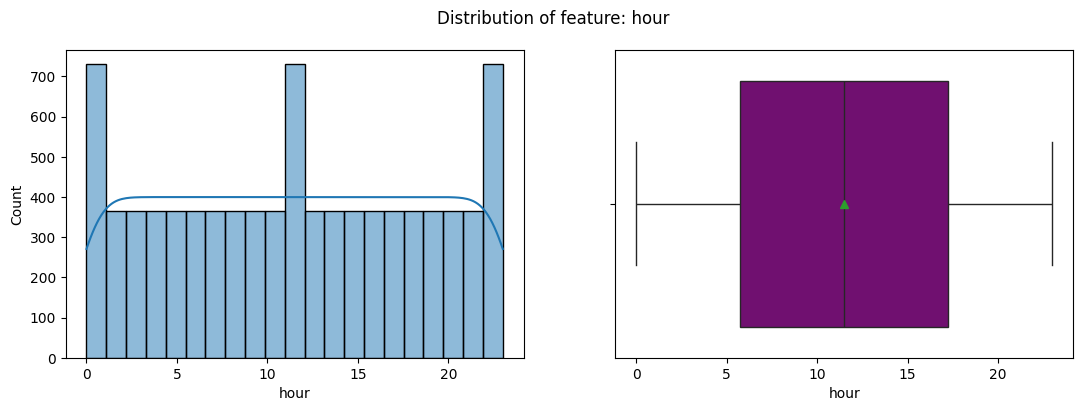

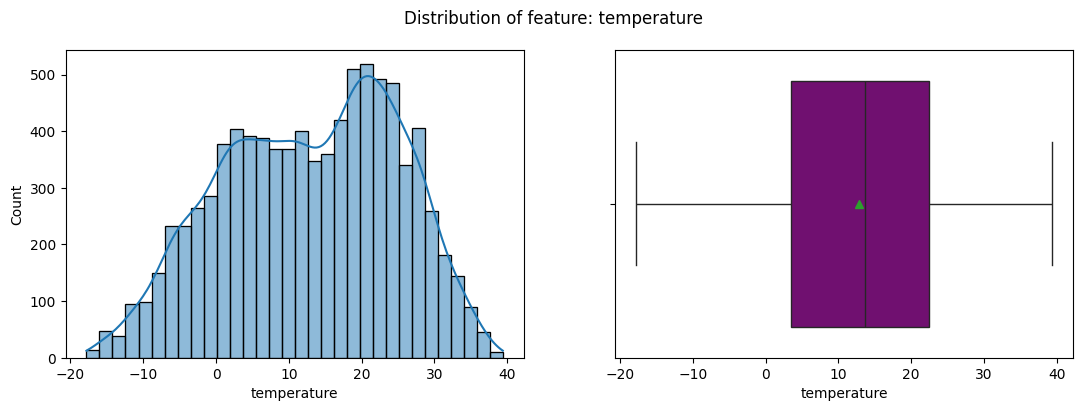

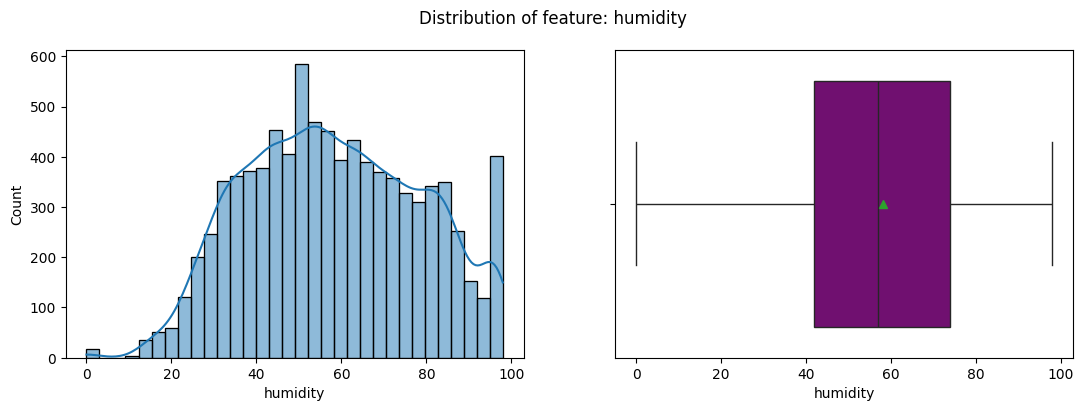

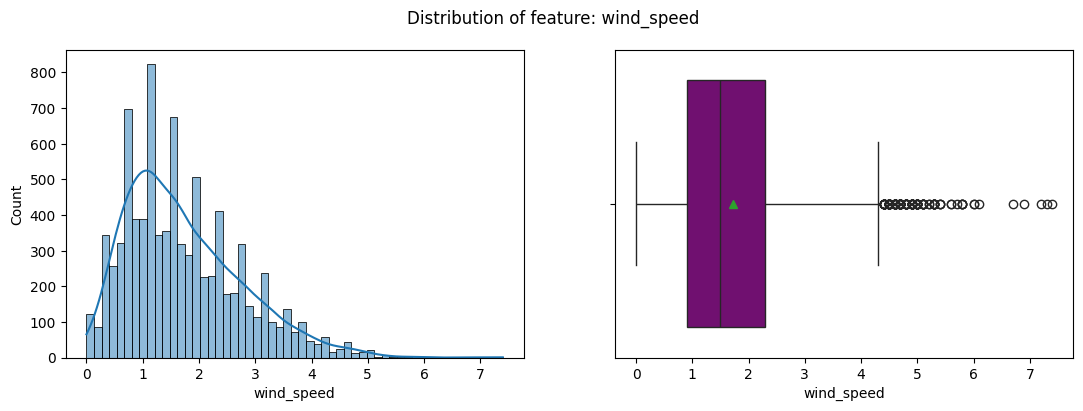

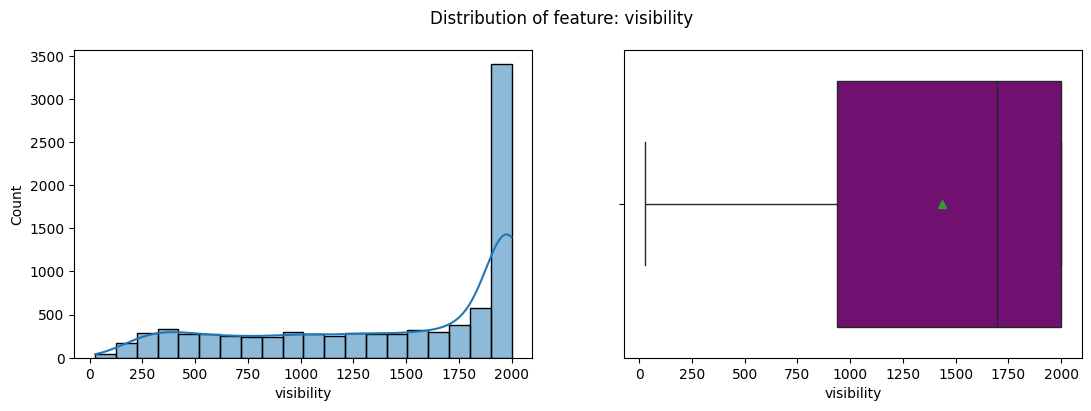

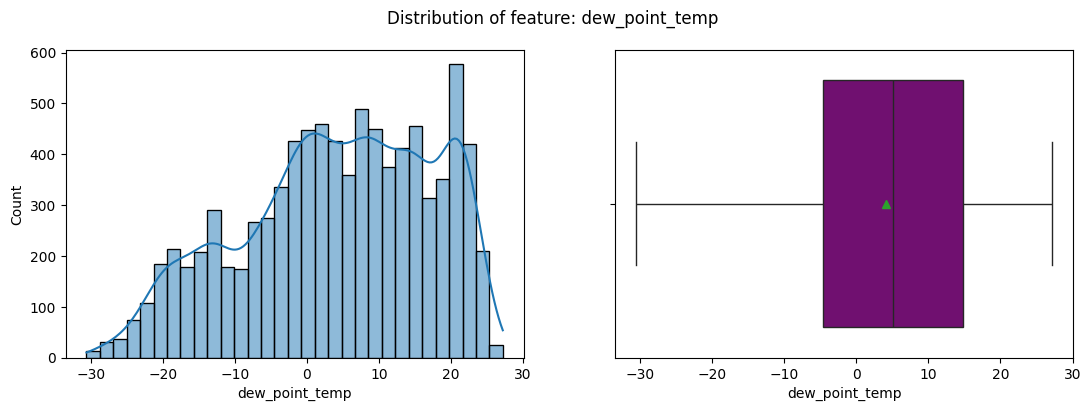

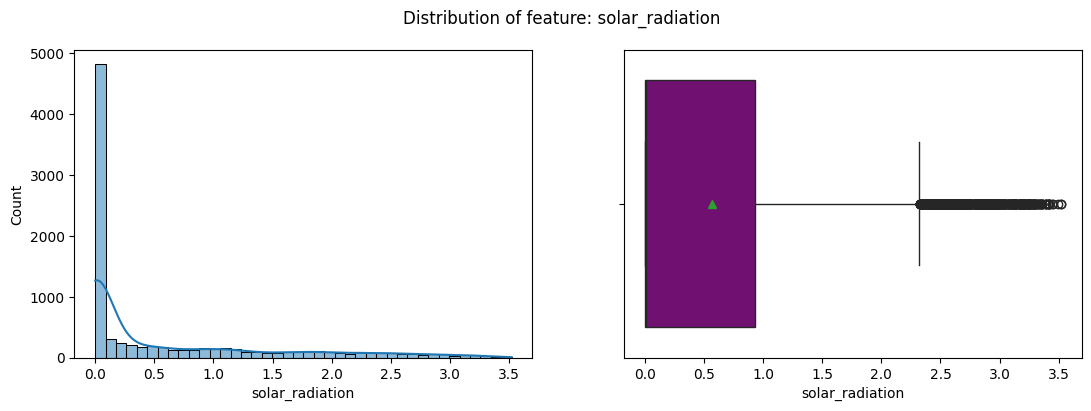

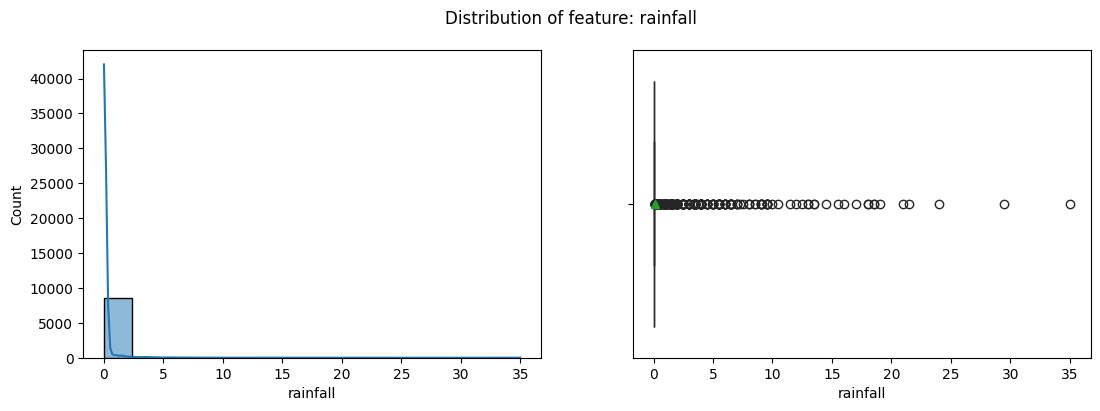

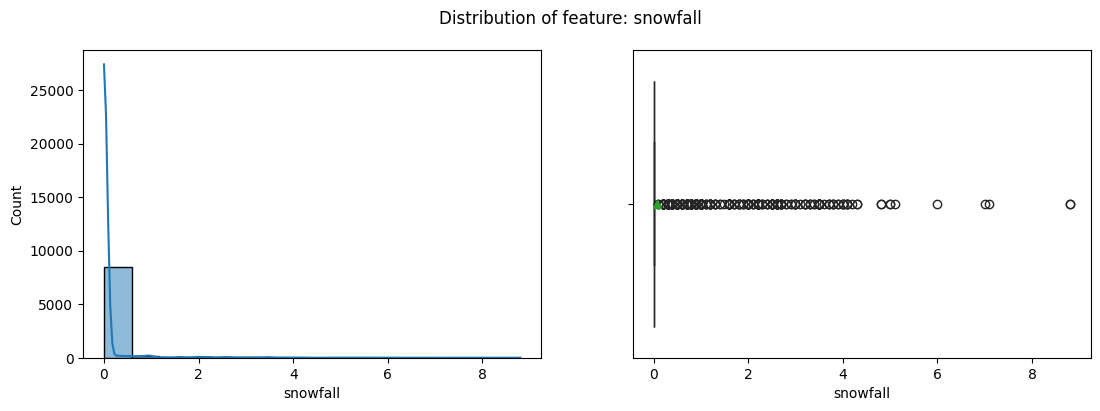

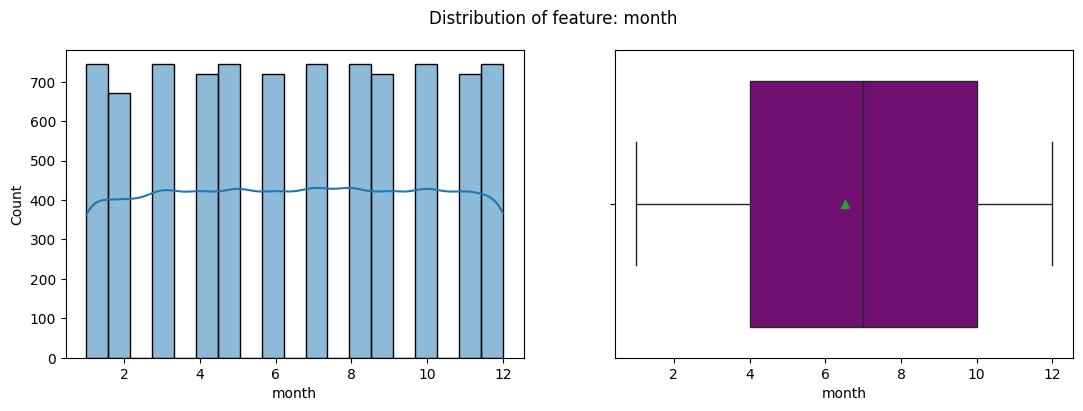

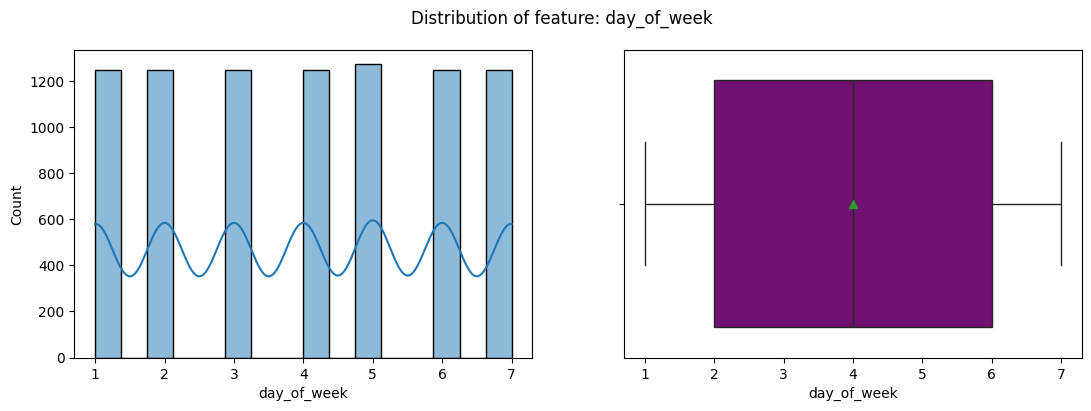

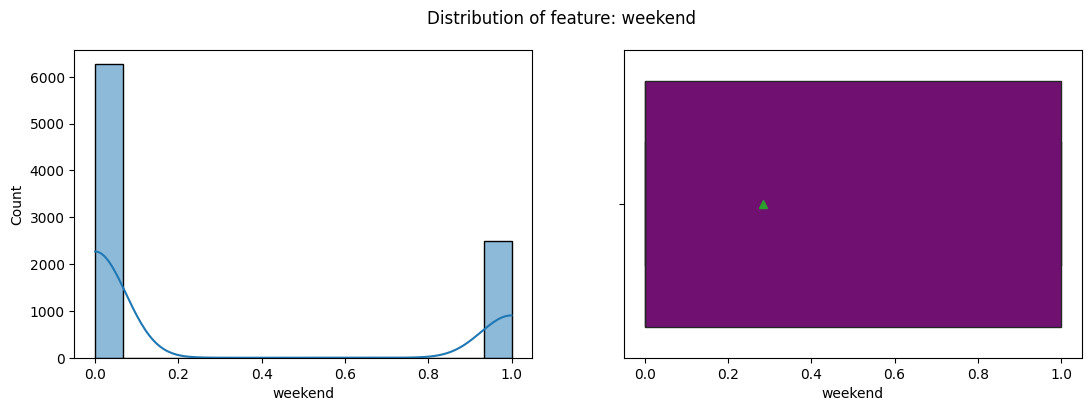

In [24]:
for col in df_new.describe().columns:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(13,4))
    sns.histplot(df_new[col], ax = axes[0],kde = True)
    sns.boxplot(df_new[col], ax = axes[1],orient='h',showmeans=True,color='purple')
    fig.suptitle("Distribution of feature: "+ col, fontsize = 12)
    plt.show()

####Understanding the relationship between dependent and continuous variables

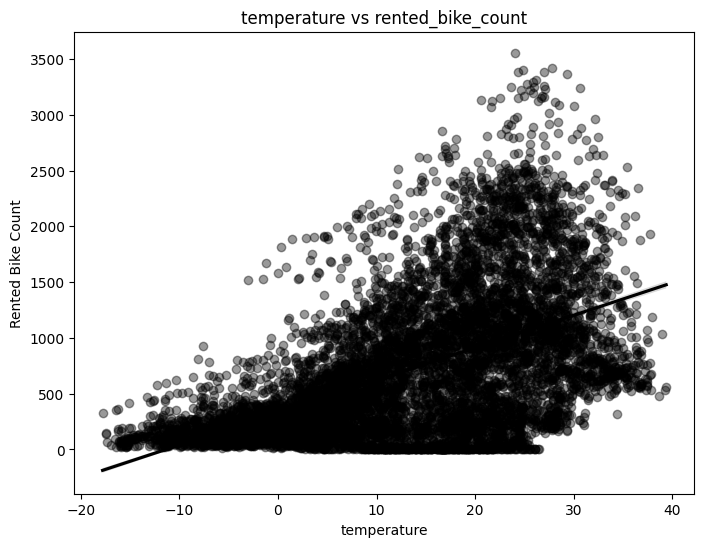

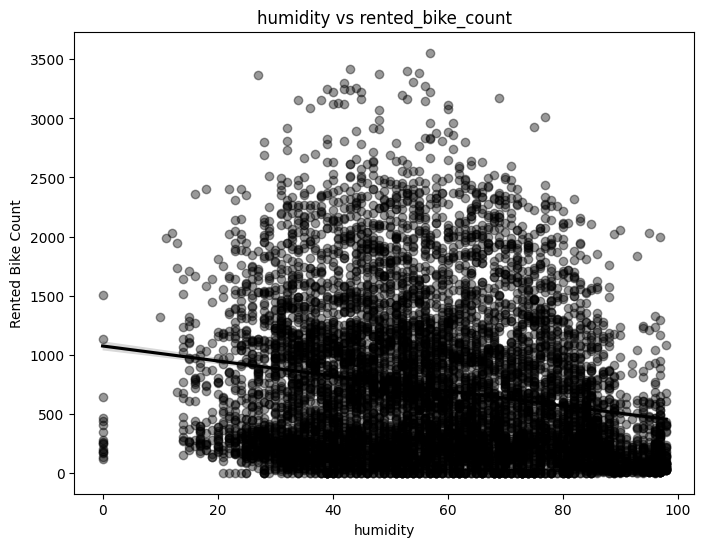

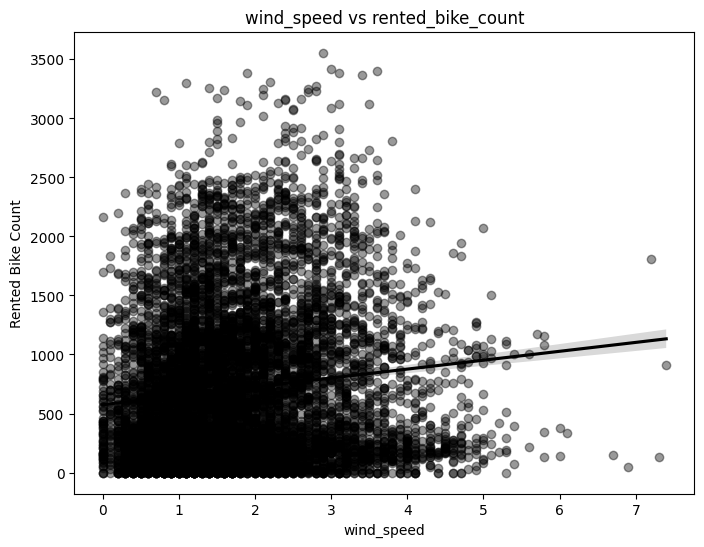

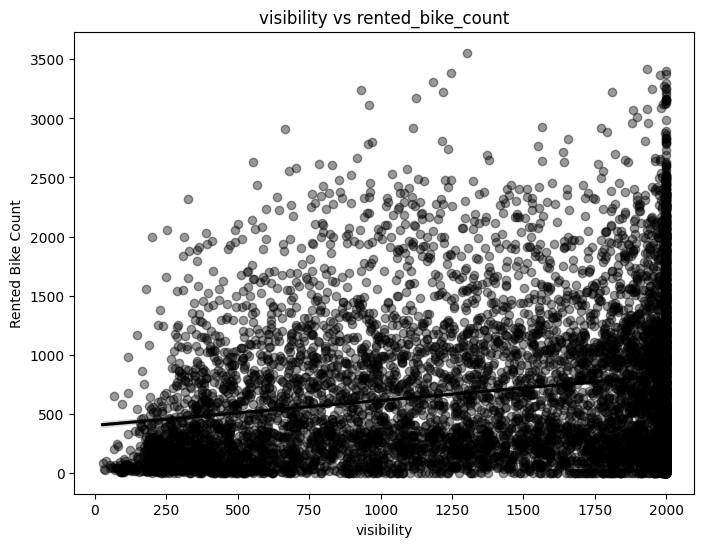

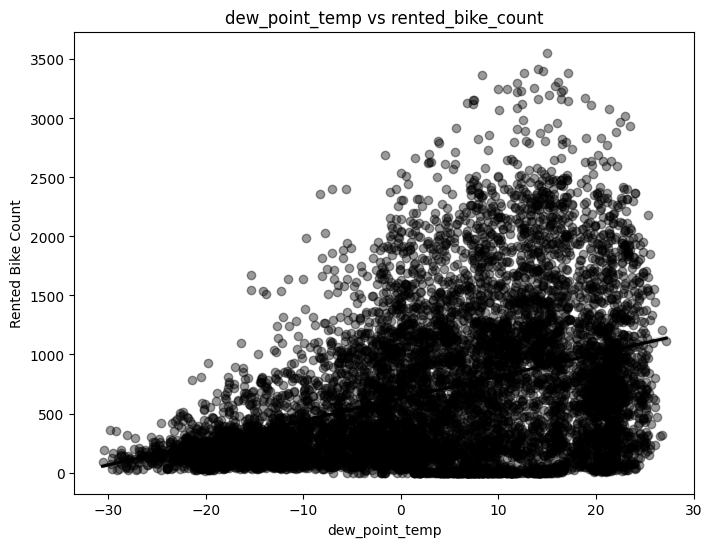

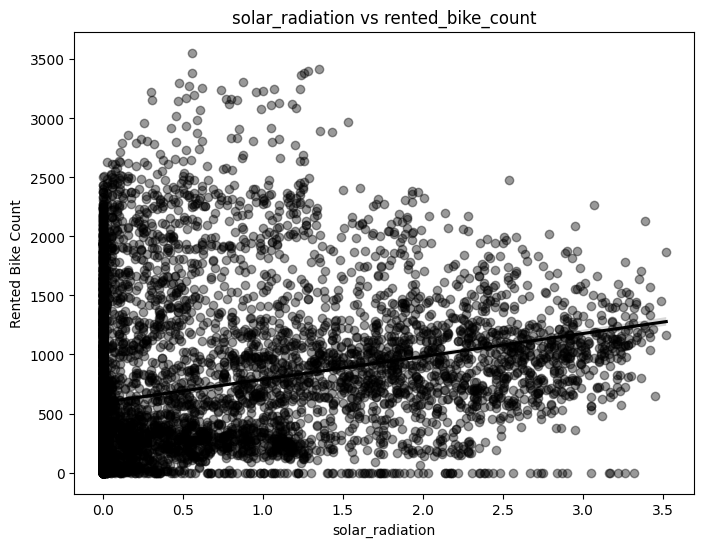

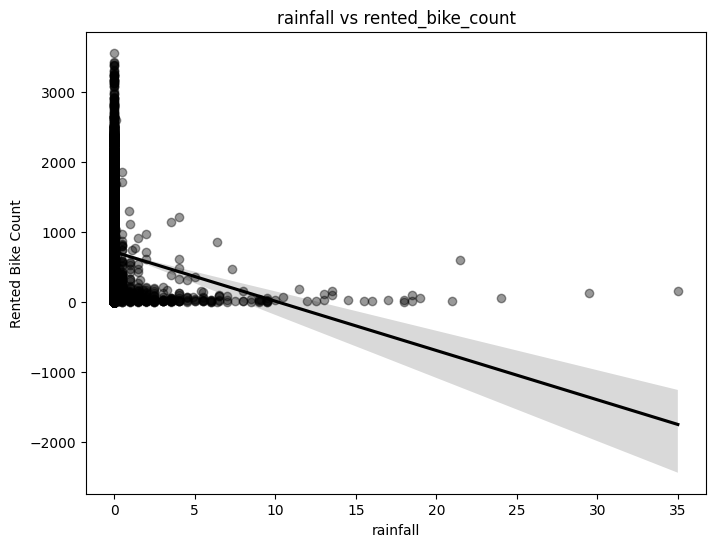

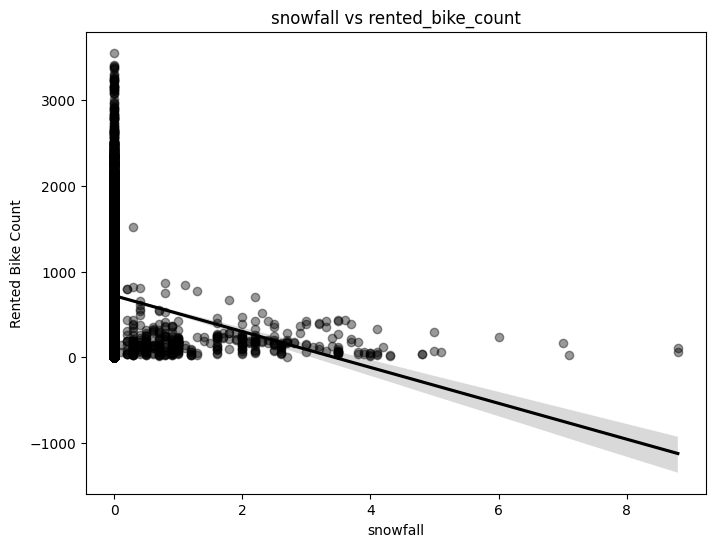

In [25]:
for i in cont_var:
  plt.figure(figsize=(8,6))
  sns.regplot(x=i,y=dep_var[0],data=df_new, color = 'black', scatter_kws={'alpha': 0.4})
  plt.ylabel("Rented Bike Count")
  plt.xlabel(i)
  plt.title(i +' vs '+ dep_var[0])
  plt.show()

####Understanding the relationship between dependent and categorical variables

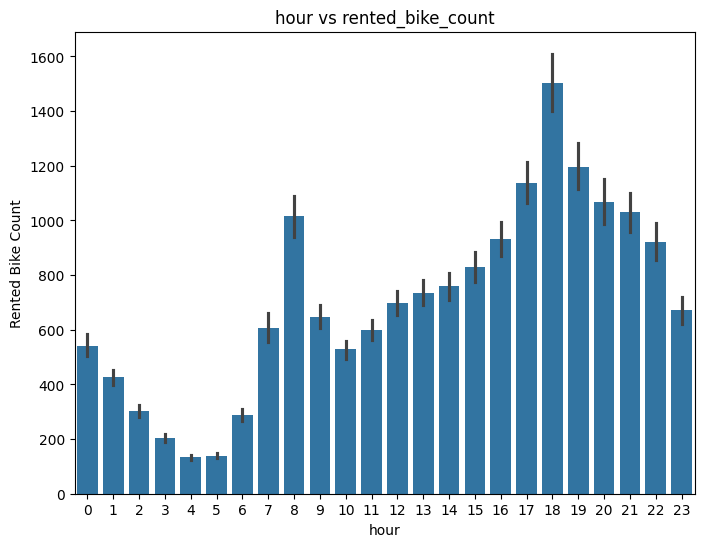

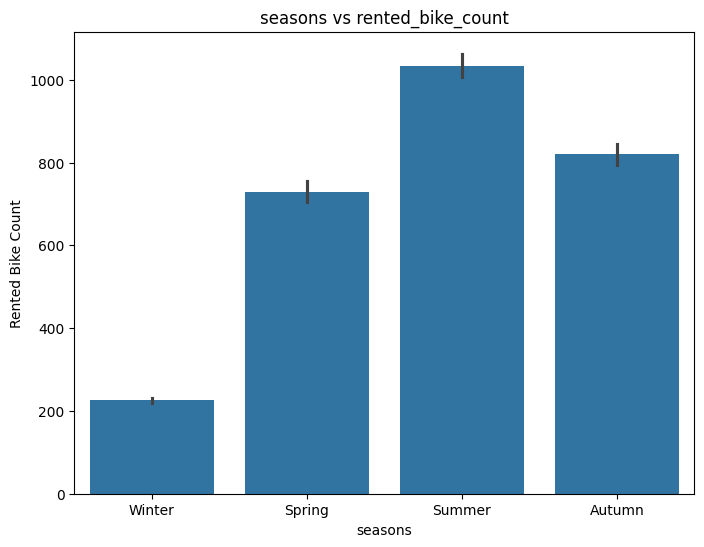

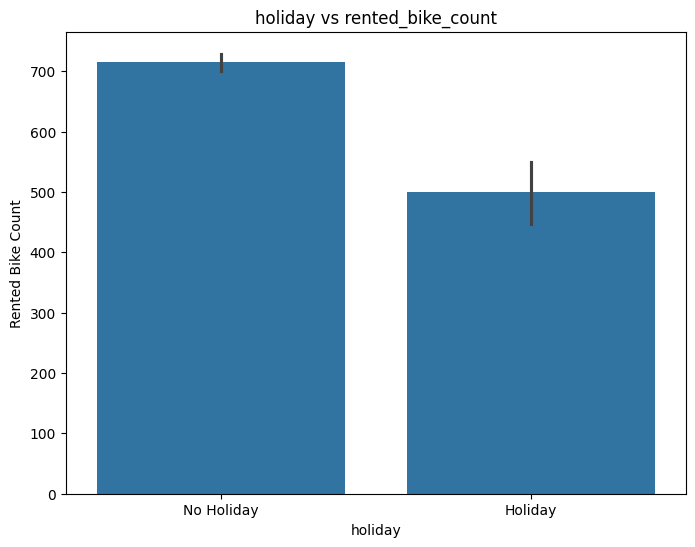

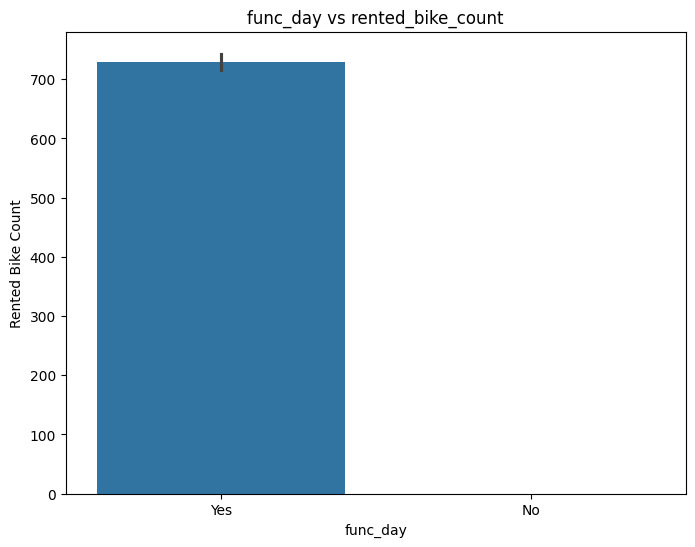

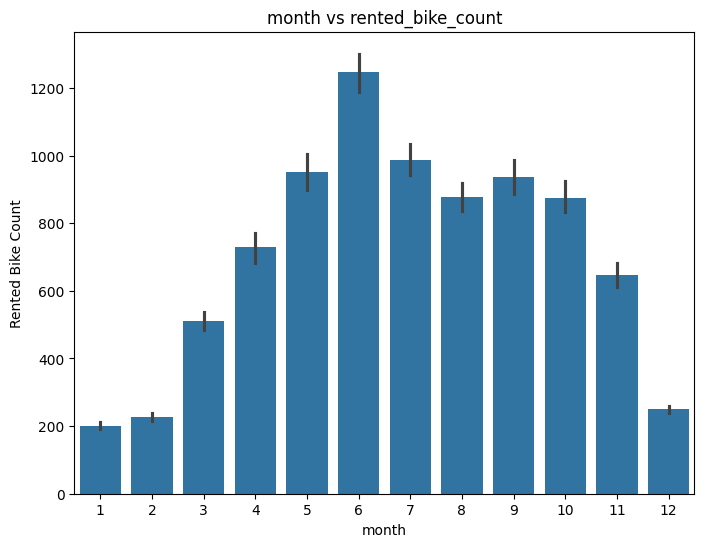

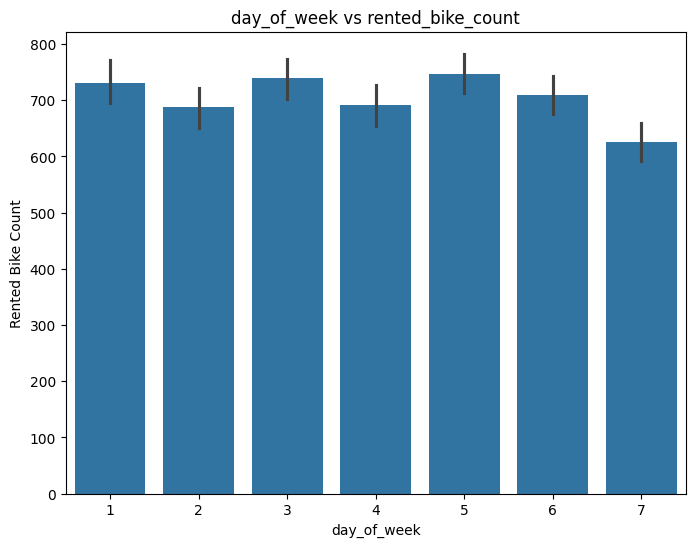

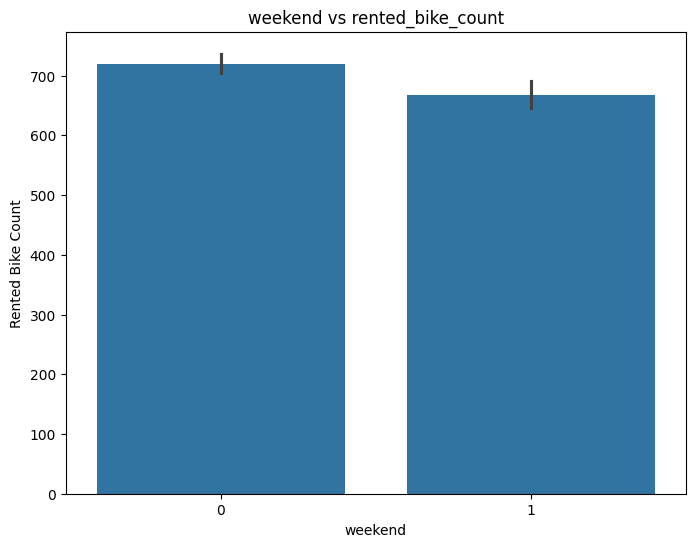

In [26]:
# Analyzing the relationship between the dependent variable and the categorical variables
for i in cat_var:
  plt.figure(figsize=(8,6))
  sns.barplot(x=i,y=dep_var[0],data=df_new)
  plt.ylabel("Rented Bike Count")
  plt.xlabel(i)
  plt.title(i +' vs '+ dep_var[0])
  plt.show()

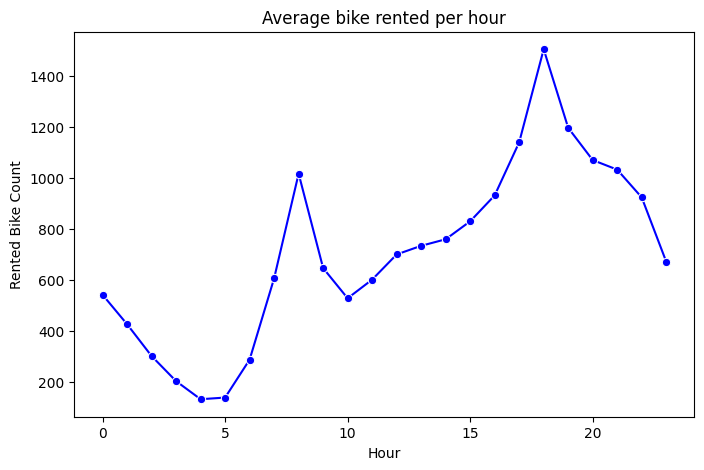

In [27]:
avg_rent_hrs = df_new.groupby('hour')['rented_bike_count'].mean()

plt.figure(figsize=(8,5))
sns.lineplot(data=avg_rent_hrs, marker='o', color = 'blue')
plt.ylabel("Rented Bike Count")
plt.xlabel("Hour")
plt.title('Average bike rented per hour')
plt.show()

##Bike Demand throughout the day

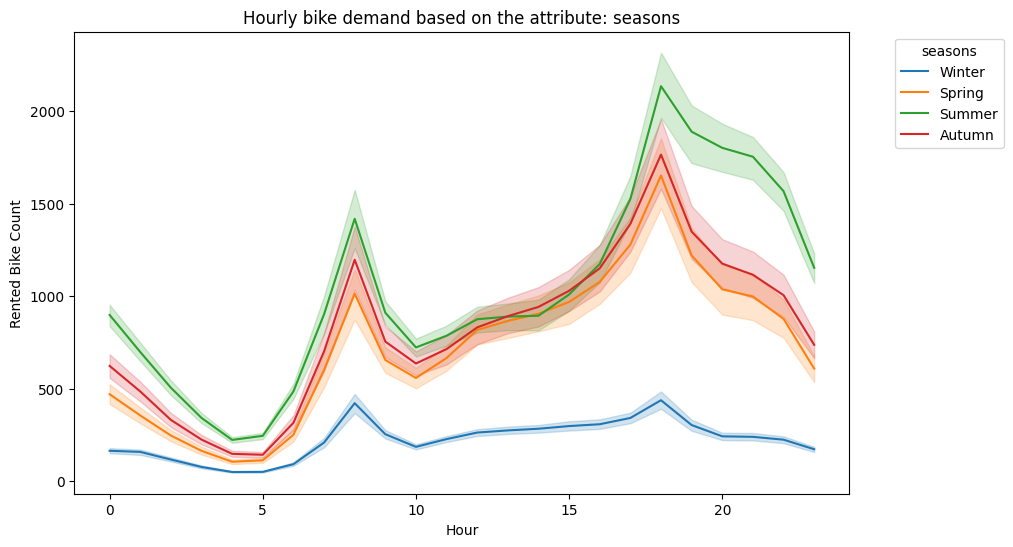

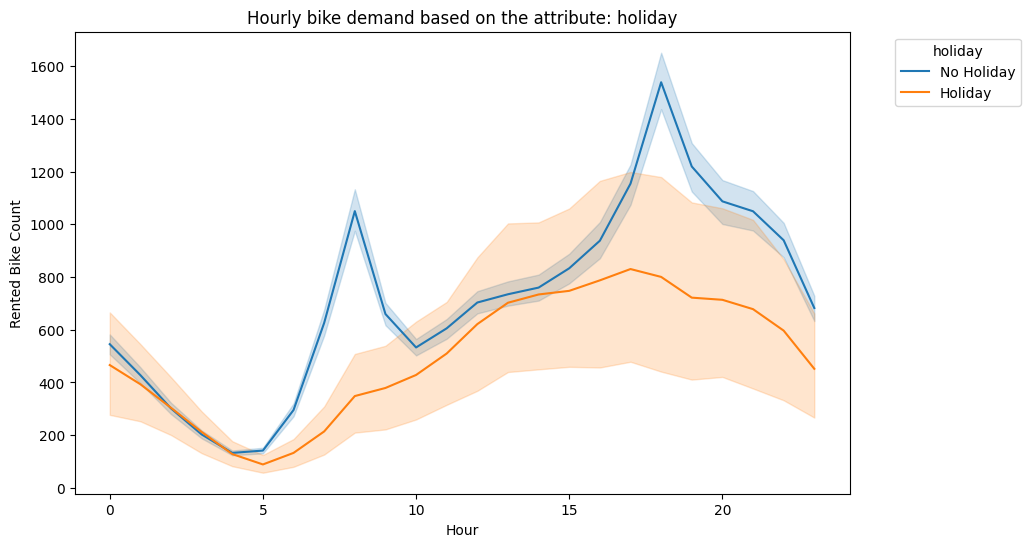

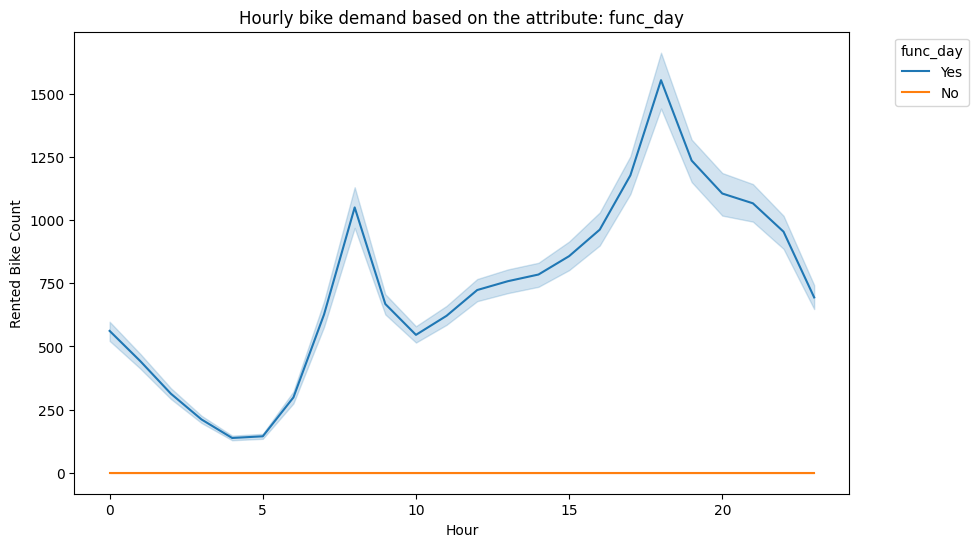

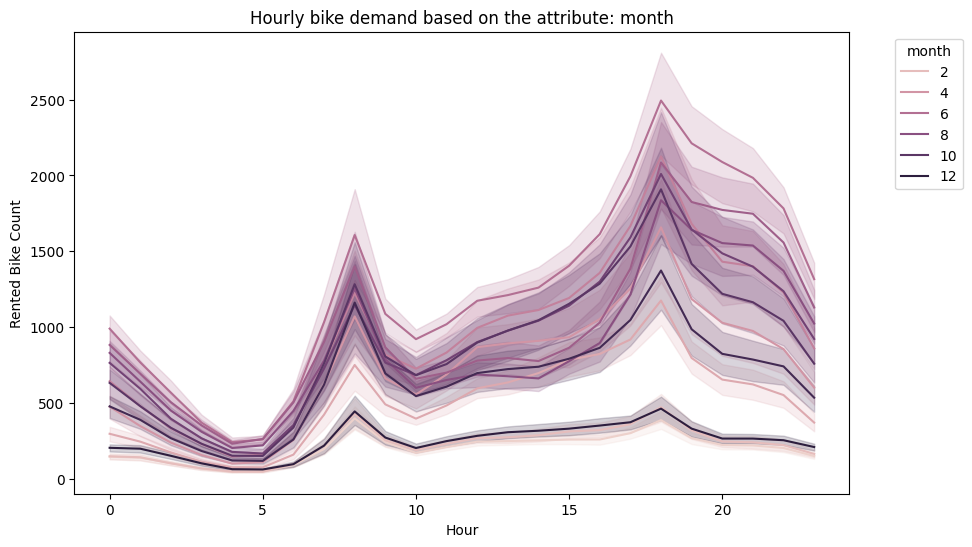

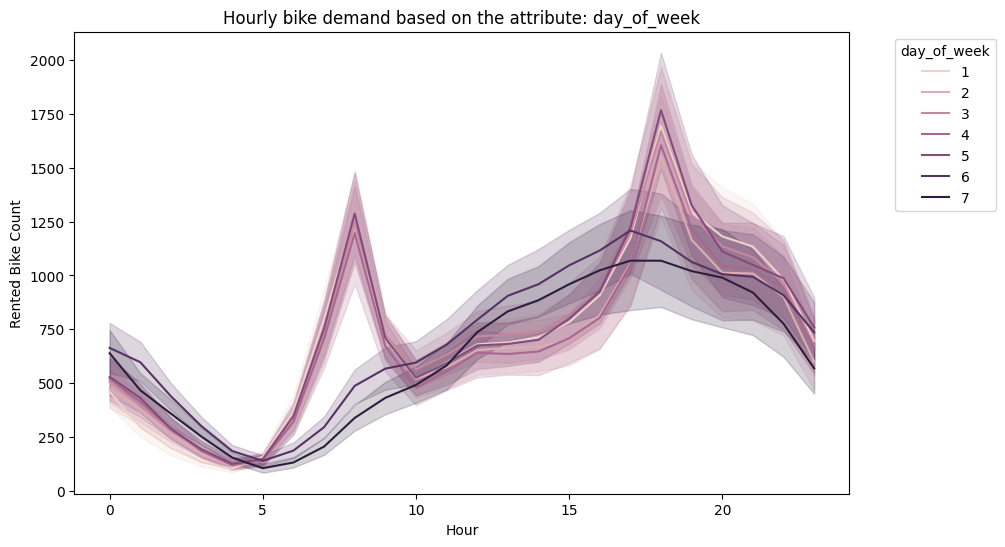

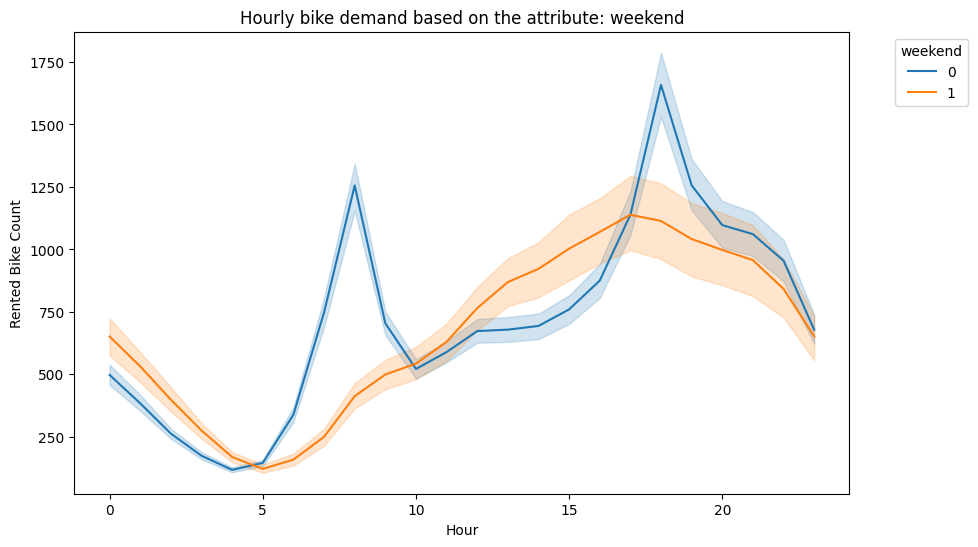

In [28]:
for i in cat_var:
  if i == 'hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(10,6))
    sns.lineplot(data=df_new, x='hour', y='rented_bike_count', hue=i, ax=ax)
    plt.ylabel("Rented Bike Count")
    plt.xlabel("Hour")
    plt.title('Hourly bike demand based on the attribute: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show()

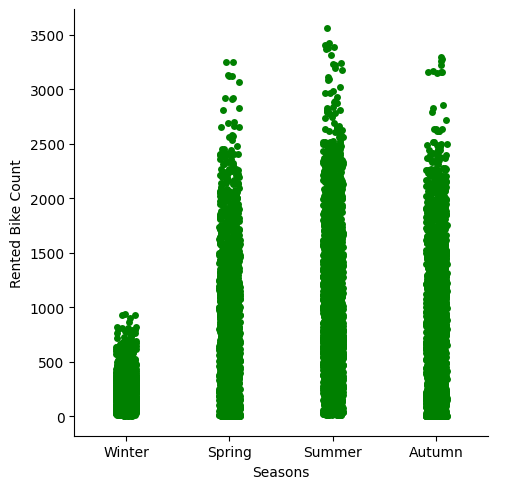

In [29]:
sns.catplot(x='seasons',y='rented_bike_count',data=df_new, color = 'g')
plt.ylabel("Rented Bike Count")
plt.xlabel("Seasons")
plt.show()

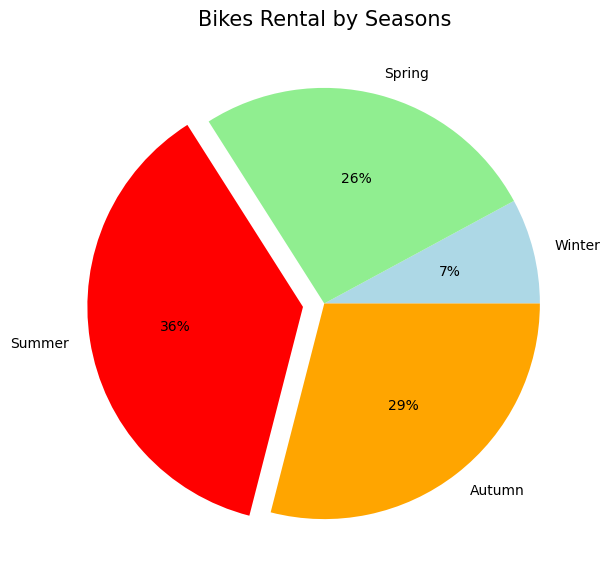

In [30]:
Winter=df_new[df_new["seasons"]=='Winter'].sum()
Spring=df_new[df_new["seasons"]=='Spring'].sum()
Summer=df_new[df_new["seasons"]=='Summer'].sum()
Autumn=df_new[df_new["seasons"]=='Autumn'].sum()

explode = (0, 0, 0.1, 0)
colors = ['lightblue', 'lightgreen', 'red', 'orange']
BikeSeasons={"Winter":Winter["rented_bike_count"],"Spring":Spring["rented_bike_count"],"Summer":Summer["rented_bike_count"],"Autumn":Autumn["rented_bike_count"]}
plt.gcf().set_size_inches(7,7)
plt.pie(BikeSeasons.values(),labels=BikeSeasons.keys(), autopct='%1d%%', explode=explode, colors=colors);
plt.title("Bikes Rental by Seasons", fontsize=15)
plt.show()

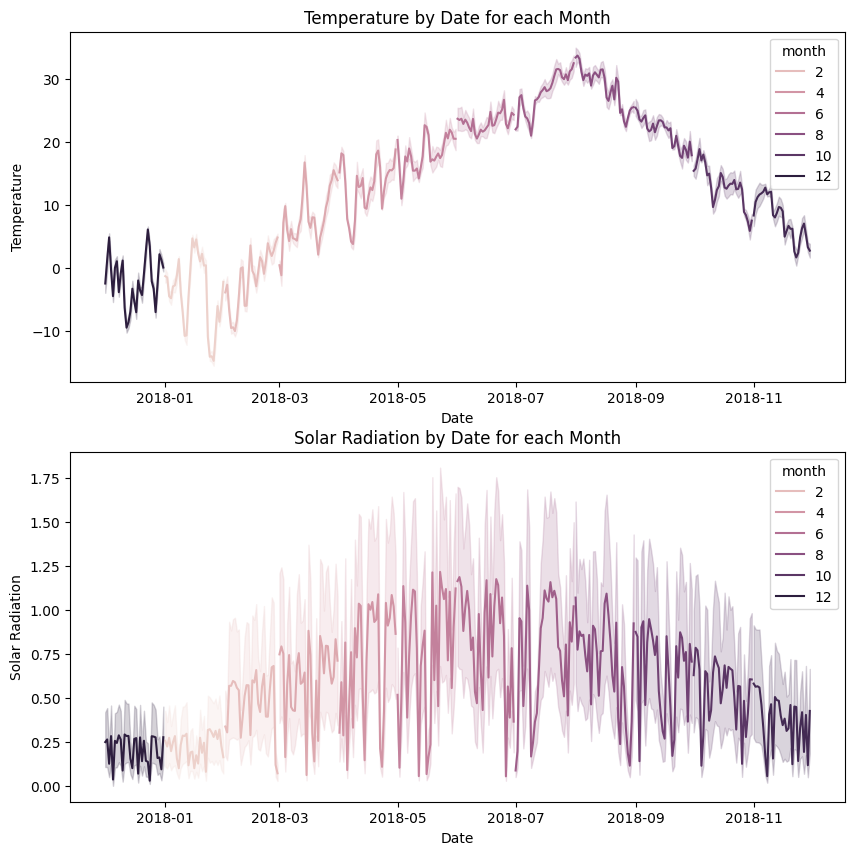

In [31]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
sns.lineplot(x='date', y='temperature', hue='month', data=df_new)
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title("Temperature by Date for each Month")

plt.subplot(2, 1, 2)
sns.lineplot(x='date', y='solar_radiation', hue='month', data=df_new)
plt.ylabel('Solar Radiation')
plt.xlabel('Date')
plt.title("Solar Radiation by Date for each Month")
plt.show()

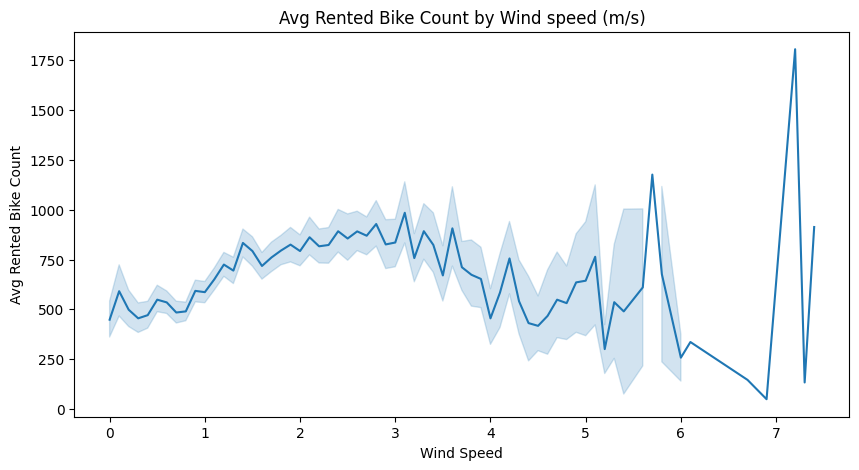

In [32]:
avg_rent_hrs = df_new.groupby('wind_speed')['rented_bike_count'].mean()
plt.figure(figsize=(10,5))
sns.lineplot(x='wind_speed', y='rented_bike_count', data=df_new)
plt.ylabel("Avg Rented Bike Count")
plt.xlabel("Wind Speed")
plt.title("Avg Rented Bike Count by Wind speed (m/s)")
plt.show()

#### Understanding correlation using heatmaps


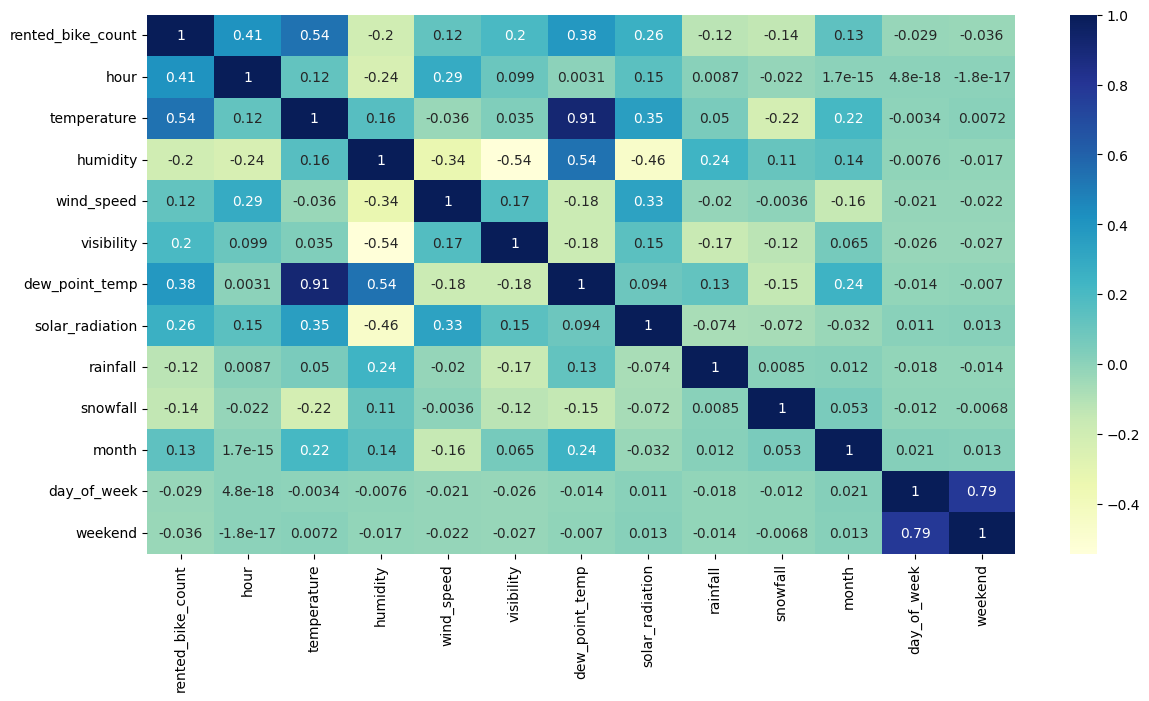

In [33]:
f, ax = plt.subplots(figsize=(14,7))
sns.heatmap(df_new.corr(), annot=True, cmap='YlGnBu')

plt.show()

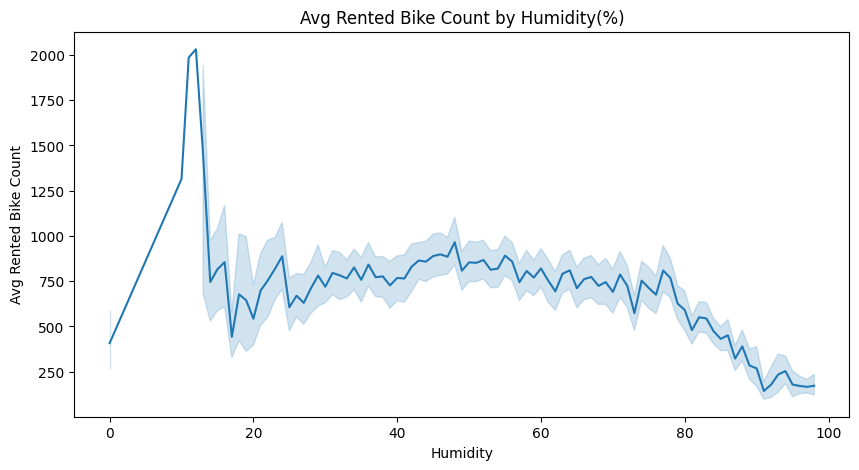

In [34]:
# Chart - 11 visualization code
plt.figure(figsize=(10,5))
sns.lineplot(x='humidity', y='rented_bike_count', data=df_new)
plt.ylabel("Avg Rented Bike Count")
plt.xlabel("Humidity")
plt.title("Avg Rented Bike Count by Humidity(%)")
plt.show()

##Data Pre-processing

### Categorical Encoding

In [35]:
df_new[df_new['snowfall'] > 0]

date  rented_bike_count  hour  temperature  humidity  wind_speed  \
120  2017-12-06                145     0         -2.8        77         0.0   
121  2017-12-06                144     1         -3.0        79         0.0   
122  2017-12-06                117     2         -3.0        79         0.0   
123  2017-12-06                 78     3         -3.2        78         0.0   
124  2017-12-06                 58     4         -3.4        75         0.0   
...         ...                ...   ...          ...       ...         ...   
8645 2018-11-26                115     5          2.1        88         1.4   
8646 2018-11-26                339     6          1.8        88         1.1   
8647 2018-11-26                819     7          1.7        89         1.3   
8648 2018-11-26               1524     8          2.0        84         1.1   
8649 2018-11-26                795     9          3.1        77         0.9   

      visibility  dew_point_temp  solar_radiation  rainfall  snowfall seasons  \
120          331            -6.2             0.00       0.1       0.1  Winter   
121          293            -6.1             0.00       0.0       0.3  Winter   
122         1862            -6.1             0.00       0.0       0.4  Winter   
123         1808            -6.4             0.00       0.2       0.4  Winter   
124         1982            -7.2             0.00       0.0       0.4  Winter   
...          ...             ...              ...       ...       ...     ...   
8645         323             0.3             0.00       0.0       0.3  Autumn   
8646         313             0.0             0.00       0.0       0.3  Autumn   
8647         295             0.0             0.00       0.0       0.3  Autumn   
8648         396            -0.4             0.03       0.0       0.3  Autumn   
8649         457            -0.5             0.40       0.0       0.2  Autumn   

         holiday func_day  month  day_of_week  weekend  
120   No Holiday      Yes     12            3        0  
121   No Holiday      Yes     12            3        0  
122   No Holiday      Yes     12            3        0  
123   No Holiday      Yes     12            3        0  
124   No Holiday      Yes     12            3        0  
...          ...      ...    ...          ...      ...  
8645  No Holiday      Yes     11            1        0  
8646  No Holiday      Yes     11            1        0  
8647  No Holiday      Yes     11            1        0  
8648  No Holiday      Yes     11            1        0  
8649  No Holiday      Yes     11            1        0  

[443 rows x 17 columns]

In [36]:
df_new[df_new['rainfall'] > 0]

date  rented_bike_count  hour  temperature  humidity  wind_speed  \
51   2017-12-03                117     3          3.4        71         1.6   
54   2017-12-03                 13     6          3.4        86         2.5   
57   2017-12-03                152     9          3.5        91         1.8   
78   2017-12-04                200     6          1.2        76         3.7   
120  2017-12-06                145     0         -2.8        77         0.0   
...         ...                ...   ...          ...       ...         ...   
8241 2018-11-09                  0     9         10.8        78         2.6   
8520 2018-11-21                119     0          7.2        74         1.2   
8523 2018-11-21                112     3          6.5        87         1.0   
8601 2018-11-24                 24     9          0.3        97         3.0   
8604 2018-11-24                167    12          2.5        84         1.9   

      visibility  dew_point_temp  solar_radiation  rainfall  snowfall seasons  \
51          1011            -1.3             0.00       0.5       0.0  Winter   
54           278             1.2             0.00       1.0       0.0  Winter   
57           231             2.1             0.02       2.5       0.0  Winter   
78           371            -2.5             0.00       0.1       0.0  Winter   
120          331            -6.2             0.00       0.1       0.1  Winter   
...          ...             ...              ...       ...       ...     ...   
8241        1985             7.1             0.13       0.5       0.0  Autumn   
8520         772             2.8             0.00       0.2       0.0  Autumn   
8523         710             4.4             0.00       1.0       0.0  Autumn   
8601          34            -0.1             0.00       9.1       7.1  Autumn   
8604        1538             0.0             0.40       1.8       7.0  Autumn   

         holiday func_day  month  day_of_week  weekend  
51    No Holiday      Yes     12            7        1  
54    No Holiday      Yes     12            7        1  
57    No Holiday      Yes     12            7        1  
78    No Holiday      Yes     12            1        0  
120   No Holiday      Yes     12            3        0  
...          ...      ...    ...          ...      ...  
8241  No Holiday       No     11            5        0  
8520  No Holiday      Yes     11            3        0  
8523  No Holiday      Yes     11            3        0  
8601  No Holiday      Yes     11            6        1  
8604  No Holiday      Yes     11            6        1  

[528 rows x 17 columns]

In [37]:
df_new['snowfall'] = df_new['snowfall'].apply(lambda x: 1 if x>0 else 0)
df_new['rainfall'] = df_new['rainfall'].apply(lambda x: 1 if x>0 else 0)
df_new['visibility'] = df_new['visibility'].apply(lambda x: 0 if 0<=x<=399 else (1 if 400<=x<=999 else 2))
df_new['func_day'] = np.where(df_new['func_day'] == 'Yes',1,0)
df_new['holiday'] = np.where(df_new['holiday'] == 'Holiday',1,0)

In [38]:
df_dummies = pd.get_dummies(df_new, columns = ['hour', 'visibility', 'month', 'day_of_week'])
df_dummies.columns

Index(['date', 'rented_bike_count', 'temperature', 'humidity', 'wind_speed',
       'dew_point_temp', 'solar_radiation', 'rainfall', 'snowfall', 'seasons',
       'holiday', 'func_day', 'weekend', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'visibility_0', 'visibility_1', 'visibility_2',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'day_of_week_7'],
      dtype='object')

In [39]:
df_dummies.head()

date  rented_bike_count  temperature  humidity  wind_speed  \
0 2017-12-01                254         -5.2        37         2.2   
1 2017-12-01                204         -5.5        38         0.8   
2 2017-12-01                173         -6.0        39         1.0   
3 2017-12-01                107         -6.2        40         0.9   
4 2017-12-01                 78         -6.0        36         2.3   

   dew_point_temp  solar_radiation  rainfall  snowfall seasons  ...  month_10  \
0           -17.6              0.0         0         0  Winter  ...         0   
1           -17.6              0.0         0         0  Winter  ...         0   
2           -17.7              0.0         0         0  Winter  ...         0   
3           -17.6              0.0         0         0  Winter  ...         0   
4           -18.6              0.0         0         0  Winter  ...         0   

   month_11  month_12  day_of_week_1  day_of_week_2  day_of_week_3  \
0         0         1              0              0              0   
1         0         1              0              0              0   
2         0         1              0              0              0   
3         0         1              0              0              0   
4         0         1              0              0              0   

   day_of_week_4  day_of_week_5  day_of_week_6  day_of_week_7  
0              0              1              0              0  
1              0              1              0              0  
2              0              1              0              0  
3              0              1              0              0  
4              0              1              0              0  

[5 rows x 59 columns]

### Feature Manipulation & Selection

---



In [40]:
df_dummies[['temperature','dew_point_temp']].corr()

temperature  dew_point_temp
temperature        1.000000        0.912798
dew_point_temp     0.912798        1.000000

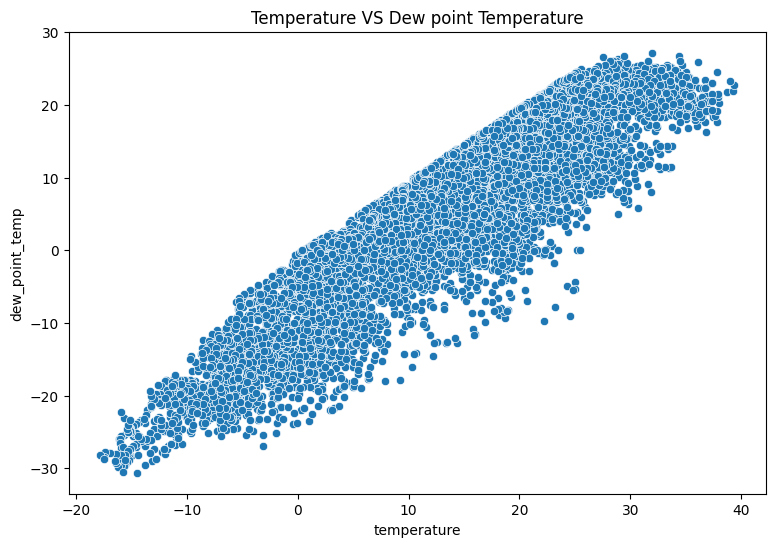

In [41]:
# Manipulating features to minimize feature correlation and create new features

plt.figure(figsize=(9,6))
sns.scatterplot(x='temperature',y='dew_point_temp',data=df_dummies)
plt.xlabel('temperature')
plt.ylabel('dew_point_temp')
plt.title('Temperature VS Dew point Temperature')
plt.show()

#### Feature Selection (Manually)

In [42]:
# Selecting features wisely to avoid overfitting
features = [i for i in df_dummies.columns if i not in ['rented_bike_count','temperature']]
features

['date',
 'humidity',
 'wind_speed',
 'dew_point_temp',
 'solar_radiation',
 'rainfall',
 'snowfall',
 'seasons',
 'holiday',
 'func_day',
 'weekend',
 'hour_0',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'visibility_0',
 'visibility_1',
 'visibility_2',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'day_of_week_7']

In [43]:
#Removing multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [44]:
continuous_variables = ['humidity', 'wind_speed', 'dew_point_temp', 'solar_radiation']

In [45]:
continuous_feature_df = pd.DataFrame(df_dummies[continuous_variables])

In [46]:
continuous_feature_df

humidity  wind_speed  dew_point_temp  solar_radiation
0           37         2.2           -17.6              0.0
1           38         0.8           -17.6              0.0
2           39         1.0           -17.7              0.0
3           40         0.9           -17.6              0.0
4           36         2.3           -18.6              0.0
...        ...         ...             ...              ...
8755        34         2.6           -10.3              0.0
8756        37         2.3            -9.9              0.0
8757        39         0.3            -9.9              0.0
8758        41         1.0            -9.8              0.0
8759        43         1.3            -9.3              0.0

[8760 rows x 4 columns]

In [47]:
calc_vif(df_dummies[[i for i in continuous_feature_df]])

variables       VIF
0         humidity  3.283426
1       wind_speed  3.751226
2   dew_point_temp  1.486157
3  solar_radiation  1.772233

In [48]:
calc_vif(df_dummies[[i for i in continuous_feature_df if i not in ['humidity','wind_speed']]])

variables       VIF
0   dew_point_temp  1.060342
1  solar_radiation  1.060342

In [49]:
df_dummies.drop(['date','weekend', 'temperature','seasons'],axis=1, inplace=True)

In [50]:
df_dummies.head()

rented_bike_count  humidity  wind_speed  dew_point_temp  solar_radiation  \
0                254        37         2.2           -17.6              0.0   
1                204        38         0.8           -17.6              0.0   
2                173        39         1.0           -17.7              0.0   
3                107        40         0.9           -17.6              0.0   
4                 78        36         2.3           -18.6              0.0   

   rainfall  snowfall  holiday  func_day  hour_0  ...  month_10  month_11  \
0         0         0        0         1       1  ...         0         0   
1         0         0        0         1       0  ...         0         0   
2         0         0        0         1       0  ...         0         0   
3         0         0        0         1       0  ...         0         0   
4         0         0        0         1       0  ...         0         0   

   month_12  day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  \
0         1              0              0              0              0   
1         1              0              0              0              0   
2         1              0              0              0              0   
3         1              0              0              0              0   
4         1              0              0              0              0   

   day_of_week_5  day_of_week_6  day_of_week_7  
0              1              0              0  
1              1              0              0  
2              1              0              0  
3              1              0              0  
4              1              0              0  

[5 rows x 55 columns]

### Data Transformation

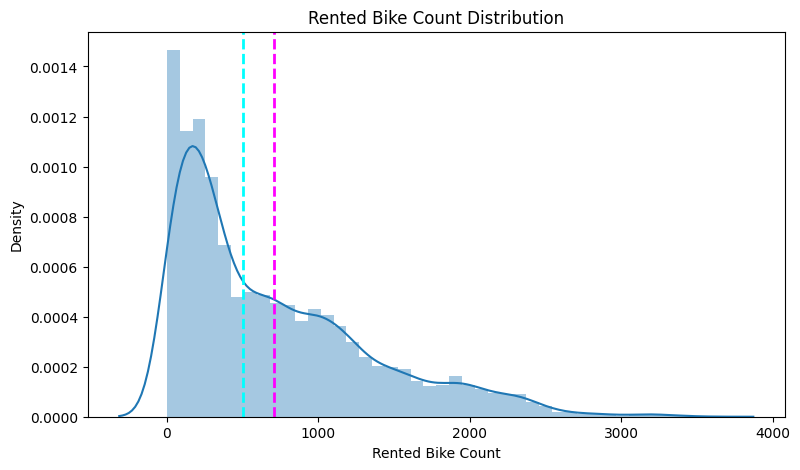

In [51]:
plt.figure(figsize=(9,5))
sns.distplot(df_dummies[dep_var])
plt.xlabel('Rented Bike Count')
plt.title('Rented Bike Count Distribution')
plt.axvline(df_dummies[dep_var[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df_dummies[dep_var[0]].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [52]:
# Skew of the dependent variable
df_dummies[dep_var].skew()

rented_bike_count    1.153428
dtype: float64

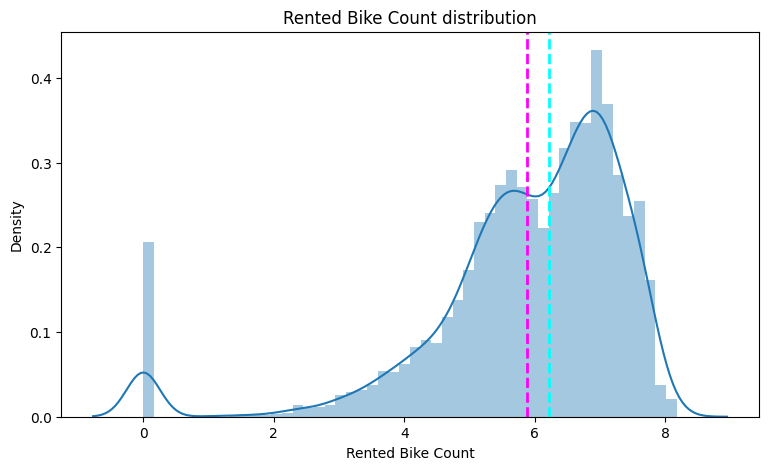

In [53]:
# Visualizing the distribution of dependent variable after log transformation
plt.figure(figsize=(9,5))
sns.distplot(np.log1p(df_dummies[dep_var]))
plt.xlabel('Rented Bike Count')
plt.title('Rented Bike Count distribution')
plt.axvline(np.log1p(df_dummies['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.log1p(df_dummies['rented_bike_count']).median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [54]:
# Skew of the dependent variable after log transformation
np.log1p(df_dummies[dep_var]).skew()

rented_bike_count   -1.832199
dtype: float64

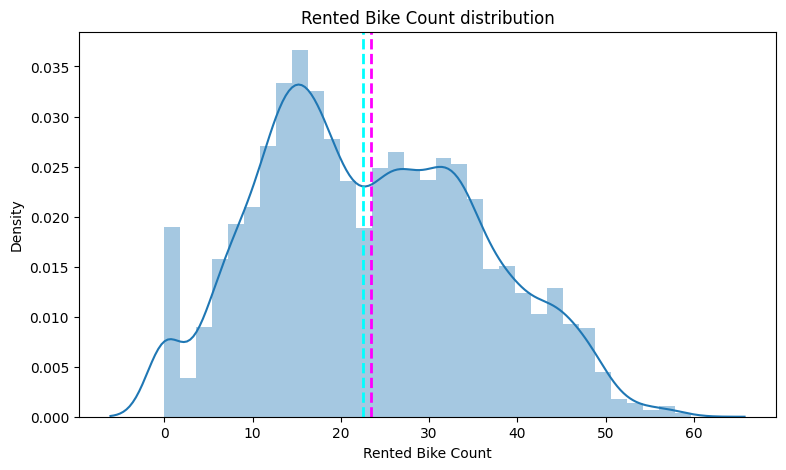

In [55]:
# Visualizing the distribution of dependent variable after sqrt transformation
plt.figure(figsize=(9,5))
sns.distplot(np.sqrt(df_dummies[dep_var]))
plt.xlabel('Rented Bike Count')
plt.title('Rented Bike Count distribution')
plt.axvline(np.sqrt(df_dummies['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.sqrt(df_dummies['rented_bike_count']).median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [56]:
# Skew of the dependent variable after sqrt transformation
np.sqrt(df_dummies[dep_var]).skew()

rented_bike_count    0.237362
dtype: float64

In [90]:
# Defining dependent and independent variables
X = df_dummies.drop('rented_bike_count',axis=1)
y = np.sqrt(df_dummies[dep_var])

In [91]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [92]:
y

rented_bike_count
0             15.937377
1             14.282857
2             13.152946
3             10.344080
4              8.831761
...                 ...
8755          31.670175
8756          27.640550
8757          26.343880
8758          26.683328
8759          24.166092

[8760 rows x 1 columns]

PCA on df_dummies_copy

In [93]:
df_dummies_copy = df_dummies

In [94]:
from sklearn.decomposition import PCA

num_components = min(X.shape[0], X.shape[1])
pca = PCA(n_components=num_components)
X = pca.fit_transform(X_scaled)

In [95]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 0)

In [96]:
X_train

array([[ 4.01937328e-01, -2.18699569e+00, -5.32325315e-01, ...,
         8.03556725e-16, -4.91563775e-16, -2.01859491e-16],
       [-2.06760090e+00, -3.15615936e+00,  8.35786187e-01, ...,
         2.33828199e-16,  1.42311012e-16,  1.68064888e-16],
       [-1.87302408e+00, -9.73836889e-01,  1.05026945e+00, ...,
         5.69602622e-16,  2.80606917e-17, -2.31609321e-17],
       ...,
       [ 3.37794993e-01, -2.05252239e+00,  3.65104763e+00, ...,
         4.18167389e-16, -2.80577988e-16,  2.59182362e-17],
       [-2.24765944e-01,  2.15800025e-01, -6.03767825e-01, ...,
        -4.36399361e-17, -7.36695719e-17, -2.01957279e-16],
       [ 1.72270723e+00,  1.01567337e+00,  1.52321092e+00, ...,
        -1.57497912e-16,  8.65459777e-16, -9.63109587e-17]])

In [97]:
X_test

array([[ 8.06735833e-01, -1.89965521e-01, -8.67137696e-01, ...,
         1.09497155e-16,  1.16188081e-16,  2.82747187e-17],
       [ 9.70133721e-01, -9.08143807e-01, -2.05013449e+00, ...,
        -5.88933458e-17,  2.10195110e-16,  3.33956768e-16],
       [-1.37503707e+00,  2.56235333e+00,  4.62583660e-01, ...,
         4.50917224e-16, -3.51129139e-19,  8.31200142e-17],
       ...,
       [ 4.01978032e+00, -1.40178568e+00,  1.50187453e+00, ...,
         4.13230428e-16, -6.08837009e-16, -4.22509129e-16],
       [-1.22250241e+00,  1.67060000e+00, -1.54606444e-01, ...,
         1.84207753e-16, -6.17798794e-17, -5.39799844e-17],
       [ 1.67869082e+00,  9.73875933e-01,  1.50950564e+00, ...,
         3.61771500e-16,  2.48255914e-17,  2.66761096e-16]])

ML Model Implementation

In [98]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
  plot the top 20 important features, and returns a list of the model scores'''

  # Squring the y test and and pred as we have used sqrt transformation
  y_t = np.square(y_test)
  y_p = np.square(y_pred)
  y_train2 = np.square(y_train)
  y_train_pred = np.square(model.predict(X_train))

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_t,y_p)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_t,y_p)
  r2_train = r2_score(y_train2, y_train_pred)
  r2 = r2_score(y_t,y_p)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values
  plt.figure(figsize=(13,4))
  plt.plot((y_p)[:100])
  plt.plot((np.array(y_t)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Bike Count', fontsize=15)

  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score

In [99]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])
score

Empty DataFrame
Columns: []
Index: [MSE, RMSE, MAE, Train R2, Test R2, Adjusted R2]

Linear Regression

MSE : 89610.6496216909
RMSE : 299.3503793578537
MAE : 203.49604469780977
Train R2 : 0.7843635145152636
Test R2 : 0.7803341205066185
Adjusted R2 :  0.7757239543610133


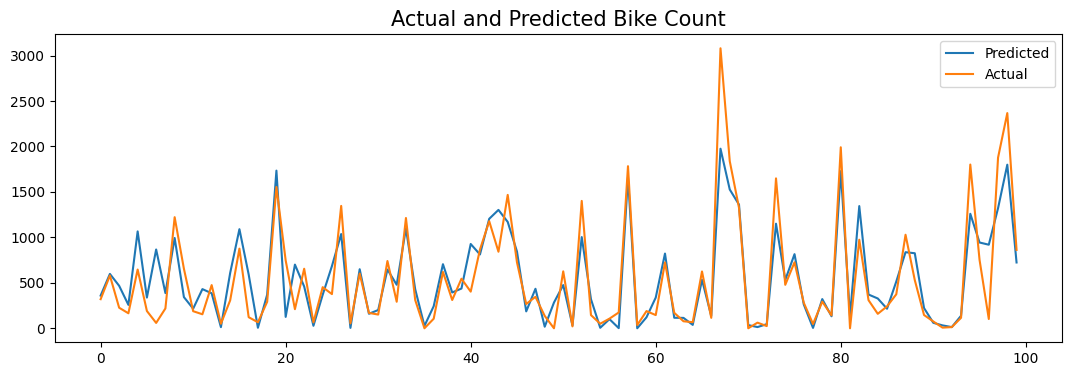

In [100]:
# Import the LinearRegression class
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_li = reg.predict(X_test)


# Visualizing evaluation Metric Score chart
linear_score = evaluate_model(reg, y_test,y_pred_li)
# Evaluation Metric Score chart
score['Linear regression'] = linear_score

Lasso Regression

MSE : 196136.02616600404
RMSE : 442.87247167328434
MAE : 300.4692130881738
Train R2 : 0.5160340937535968
Test R2 : 0.5192045491246694
Adjusted R2 :  0.5091140110961938


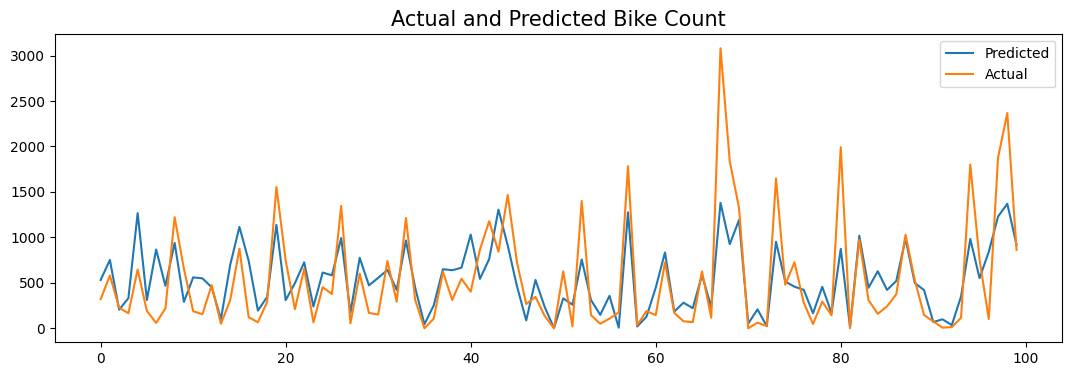

In [101]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso1 = lasso.predict(X_test)

lasso_score = evaluate_model(lasso, y_test,y_pred_lasso1)
score['Lasso regression'] = lasso_score

The optimum alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -30.680399573684035
MSE : 89286.03915382194
RMSE : 298.80769594142305
MAE : 202.81770999367026
Train R2 : 0.7846763545507283
Test R2 : 0.7811298500791439
Adjusted R2 :  0.7765363840489355


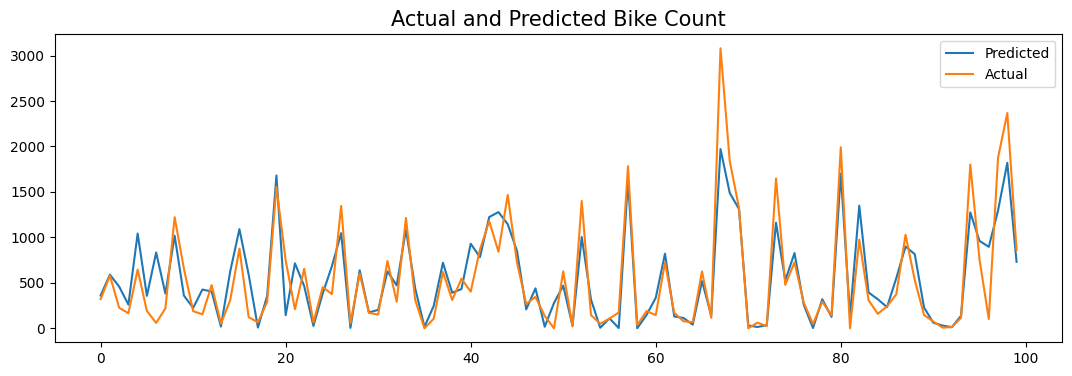

In [102]:
# Define the model
lasso = Lasso()

# Define the parameters to be optimized & Perform grid search
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting model
lasso_regressor.fit(X_train,y_train)


# Getting optimum parameters
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

# Import the Lasso Regression class with best alpha
lasso = Lasso(alpha = lasso_regressor.best_params_['alpha'])

# Fit the lasso regression model to your training data
lasso.fit(X_train, y_train)

# Predict the model
y_pred_lassocv = lasso.predict(X_test)

#Evaluation matrices for Lasso regression
lasso2 = evaluate_model(lasso, y_test,y_pred_lassocv)

name = 'Lasso with alpha = ' + str(lasso_regressor.best_params_['alpha'])

score[name] = lasso2

Ridge Regression

MSE : 89291.62929312585
RMSE : 298.8170498701937
MAE : 202.83271014209348
Train R2 : 0.7846485719464708
Test R2 : 0.7811161467651755
Adjusted R2 :  0.7765223931411256


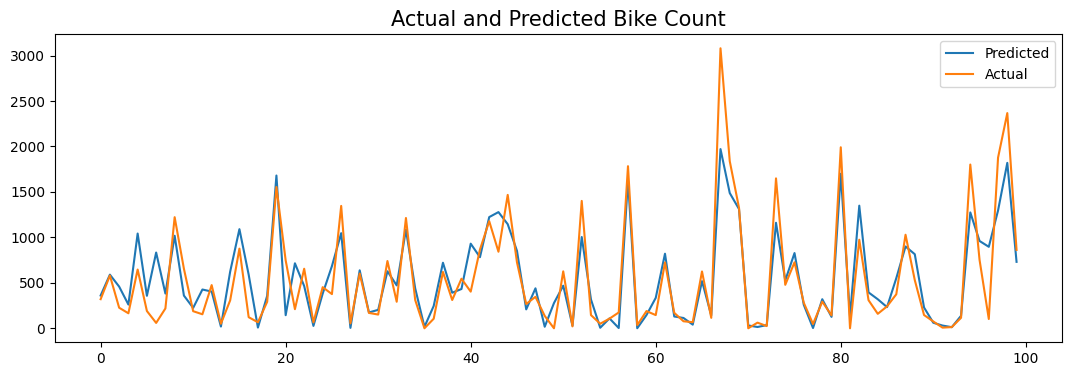

In [103]:
ridge = Ridge()

# Fit the ridge regression model to your training data
ridge.fit(X_train, y_train)

# Predict on the model
y_pred_ridge1 = ridge.predict(X_test)

result = evaluate_model(ridge, y_test,y_pred_ridge1)
score['Ridge'] = result

Decision Tree

MSE : 99390.8911719939
RMSE : 315.26320935369847
MAE : 182.80593607305937
Train R2 : 1.0
Test R2 : 0.7563594548739638
Adjusted R2 :  0.7512461282370396


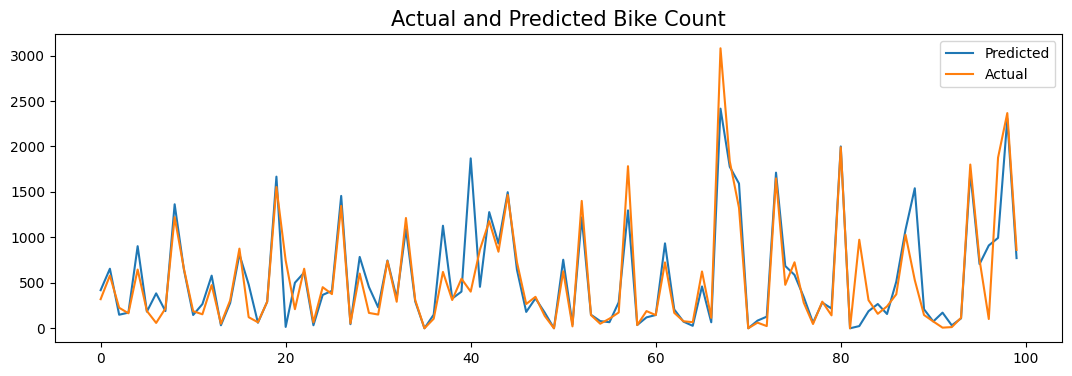

In [104]:
dt = DecisionTreeRegressor(random_state=1)

# Fit the Decision Tree model to your training data
dt.fit(X_train,y_train)

# Predict on the model
y_pred_dt = dt.predict(X_test)

result = evaluate_model(dt, y_test,y_pred_dt)
score['Decision tree'] = result

Random Forest

MSE : 43802.749122659276
RMSE : 209.29106316959468
MAE : 125.37817813468683
Train R2 : 0.9855417686408928
Test R2 : 0.8926247108923109
Adjusted R2 :  0.89037120696234


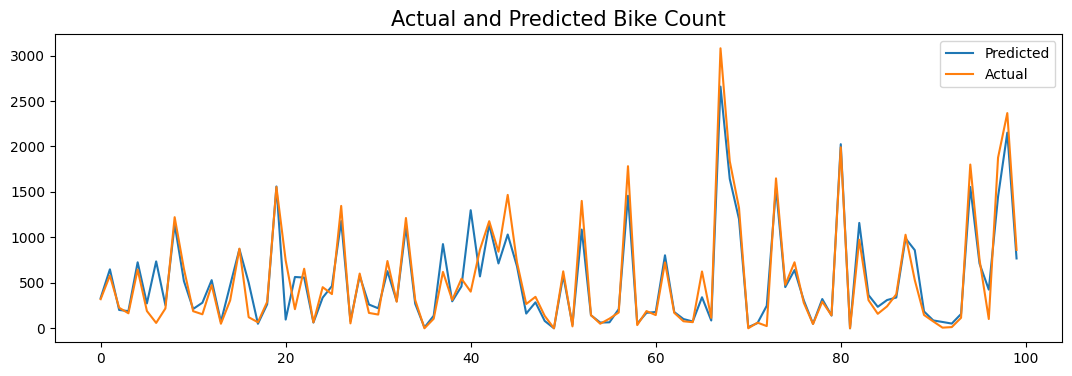

In [105]:
rf = RandomForestRegressor(random_state=0)

# Fit the Random Forest model to your training data
rf.fit(X_train,y_train)

# Predict on the model
y_pred_rf1 = rf.predict(X_test)

result = evaluate_model(rf, y_test,y_pred_rf1)
score['Random forest'] = result

Gradient Boosting Regressor

MSE : 62955.346242659936
RMSE : 250.90903977868143
MAE : 164.96464977068524
Train R2 : 0.8666399384493987
Test R2 : 0.8456752455250944
Adjusted R2 :  0.8424364049725702


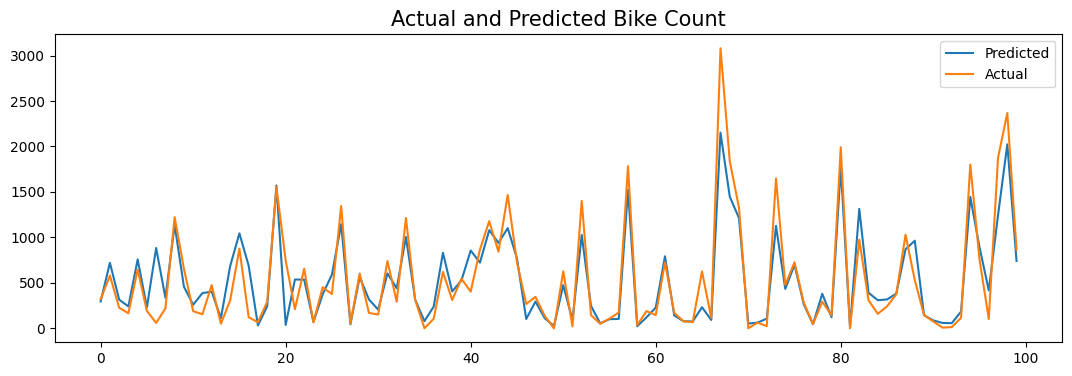

In [106]:
gb = GradientBoostingRegressor(random_state=0)

# Fit the Gradient Boosting model to the training data
gb.fit(X_train,y_train)

# Predict on the model
y_pred_gb1 = gb.predict(X_test)


result = evaluate_model(gb, y_test,y_pred_gb1)
score['Gradient Boosting Regressor'] = result

Extreme Gradient Boosting

MSE : 41816.285098024986
RMSE : 204.49030563336
MAE : 123.80381900404511
Train R2 : 0.9946142063987615
Test R2 : 0.897494203178054
Adjusted R2 :  0.8953428961324321


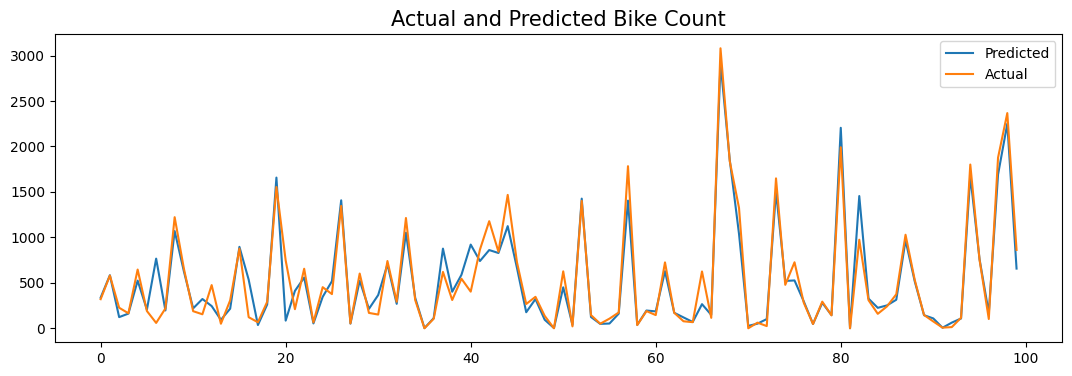

In [107]:
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')

# Fit the Extreme Gradient Boosting model to the training data
xgb_model.fit(X_train,y_train)

# Predict on the model
y_pred_xgb1 = xgb_model.predict(X_test)


result = evaluate_model(xgb_model, y_test,y_pred_xgb1)
score['Extreme Gradient Boosting Regressor'] = result

In [108]:
score

Linear regression  Lasso regression  Lasso with alpha = 1e-15  \
MSE               89610.649622     196136.026166              89286.039154   
RMSE                299.350379        442.872472                298.807696   
MAE                 203.496045        300.469213                202.817710   
Train R2              0.784364          0.516034                  0.784676   
Test R2               0.780334          0.519205                  0.781130   
Adjusted R2           0.775724          0.509114                  0.776536   

                    Ridge  Decision tree  Random forest  \
MSE          89291.629293   99390.891172   43802.749123   
RMSE           298.817050     315.263209     209.291063   
MAE            202.832710     182.805936     125.378178   
Train R2         0.784649       1.000000       0.985542   
Test R2          0.781116       0.756359       0.892625   
Adjusted R2      0.776522       0.751246       0.890371   

             Gradient Boosting Regressor  Extreme Gradient Boosting Regressor  
MSE                         62955.346243                         41816.285098  
RMSE                          250.909040                           204.490306  
MAE                           164.964650                           123.803819  
Train R2                        0.866640                             0.994614  
Test R2                         0.845675                             0.897494  
Adjusted R2                     0.842436                             0.895343

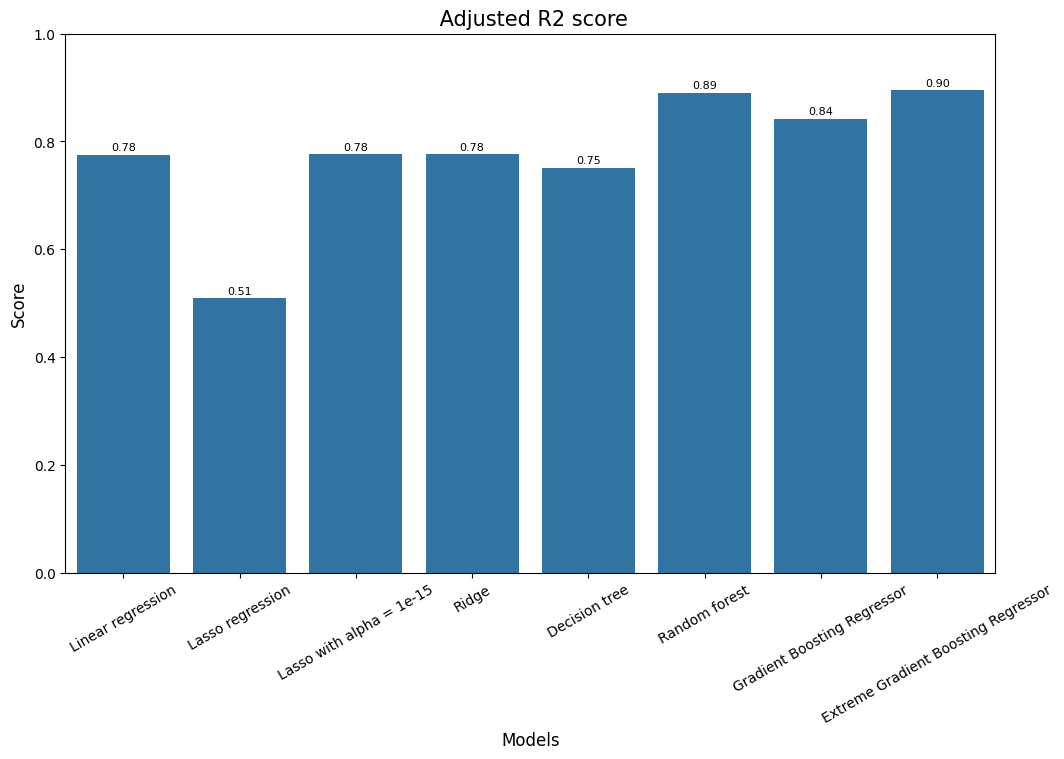

In [109]:

score_t = score.transpose()
score_t['diff']=score_t['Train R2']-score_t['Test R2']

adj = score_t['Adjusted R2']


# Visualizing a bar plot for adjusted R2 score
plt.figure(figsize=(12,7))
plots = sns.barplot(x=list(adj.index), y=adj)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 5),
                   textcoords='offset points')
plt.xticks(rotation=30)

plt.title(" Adjusted R2 score", fontsize = 15)
plt.xlabel('Models', fontsize = 12)
plt.ylabel('Score', fontsize = 12)

# Setting limit of the y axis from 0 to 30
plt.ylim(0,1)
plt.show()